# Pre-Jupyter Notebook Setup

In [6]:
# #Setup
# pyenv virtualenv 3.8.11 mbti_env
# cd ~Documents/Github/MBTI
# pyenv local mbti_env
# pyenv activate mbti_env
# python

# #Create kernel
# python -m ipykernel install --user --name mbti_env

In [ ]:
# (Run only once) Install packages
!pip install matplotlib pandas numpy seaborn textstat keras nltk colorspacious -q

# Import Libraries

In [ ]:
# General packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorspacious

# Packages for Text Preprocessing
import nltk
import emoji
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from multiprocessing import Pool

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Packages only necessary for Feature Extraction
import re
import emoji
from urllib.parse import urlparse
import textstat
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Packages for Analysis
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [3]:
# Clarify current working directory
import os
os.getcwd()

'/Users/nathantorento/Documents/GitHub/MBTI'

In [59]:
# Import Dataset
df = pd.read_csv('mbti_1.csv')

# Understanding the Dataset

In [4]:
# See number of rows and columns
df.shape

(8675, 2)

In [5]:
# See columns names
df.columns

Index(['type', 'posts'], dtype='object')

In [6]:
# Preview top of data
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [7]:
# Preview bottom of data
df.tail()

,type,posts
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...
8674,INFP,'It has been too long since I have been on per...


In [8]:
# Preview a random sample of the data
df.sample(n=5)

,type,posts
6685,ENTJ,'ENTJ women are lies.|||Noting makes me feel a...
7246,INFJ,"'It depends on the group but in the past, with..."
1713,ENFJ,'A cup of coffee and a bagel.|||Moar coffee!!!...
1503,ISTJ,'It's mostly rough guessing and process of eli...
8164,INTP,"Hehe, astrology does seem far more like crazy ..."


In [9]:
# See column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [10]:
# See statistical summaries for each column
df.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


# Data Cleaning

In [11]:
# Count the amount of missing data
# Also achieveable with df.info()
df.isnull().sum()

type     0
posts    0
dtype: int64

In [12]:
# Check for duplicates
df.duplicated().value_counts()

False    8675
Name: count, dtype: int64

# Feature Extraction

## Text separation
Looking up close at any one post reveals that each entry is actually a long string of 50 posts by the same user, each separated with '|||'. We should separate each post as it's own data entry or row. Remember, one of our ultimate goals is to create a model that most accurately predict the personality type of a user based on one post. Training on data closer to the test will generate more contextually accurate models.

In [13]:
# Examine the posts up close
df.iloc[0,1]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

# Preprocess Object

In [3]:
# Class

from sklearn.ensemble import RandomForestClassifier

class Preprocessor:
    def __init__(self, df=None, stop_words=set(stopwords.words('english')), profanities=None):
        if df is None:
            print("Please provide a dataframe using Preprocessor.fit(df) before continuing.")
        self.df = df
        self.stop_words = set(stopwords.words('english'))
        self.profanities = {'fuck': ['fuck', 'fucked', 'fucking']}

    def fit(self, df):
        self.df = self.df
        
        return self.df
    
    def lookup(self, word_to_lookup, column):
        
        return self.df[self.df[column].apply(lambda x: word_to_lookup in x)]


    # –––––––– CLEANING ––––––––
    # Separate multiple "posts" into their own rows
    def split_posts(self):
        posts_lists = []
        for i, row in self.df.iterrows():
            split_post = row['posts'].split('|||')
            for post in split_post:
                if len(post) != 0: #exclude empty posts
                    posts_lists.append({"type": row['type'], "post": post}) #store each separated post as a dictionary
        self.df = pd.DataFrame(posts_lists)
        
        return self.df
    
    # Convert emojis to text
    def convert_emojis_to_text(self, column):
        self.df['post_clean'] = self.df[column].apply(lambda x: emoji.demojize(x))
        
        return self.df
    
    # # Created a convert_emojis_parallel function as the original is too slow
    # def convert_emojis_parallel(self, column):
    #     batch_size = 1000
    #     chunks = [self.df[column][i:i+batch_size] for i in range(0, len(self.df[column]), batch_size)]

    #     with Pool() as pool:
    #         results = pool.map(self.convert_emojis_to_text, chunks)

    #     self.df['post_clean'] = pd.concat(results)

    #     return self.df

    # Remove hyperlinks
    def remove_hyperlinks(self, column):
        self.df['post_clean'] = self.df[column].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))
            
        return self.df
    
    # Remove anything starting with @ which might be a mention of another user
    def remove_mentions(self, column):
        potential_usernames = []  # Temporary list to store potential usernames

        def replace_mentions(text):
            nonlocal potential_usernames
            replaced_text = re.sub(r'@\w+\b', '', text, flags=re.IGNORECASE)
            potential_usernames.extend(re.findall(r'@\w+\b', text))  # Find and store potential usernames
            return replaced_text

        self.df['post_clean'] = self.df[column].apply(replace_mentions)

        return self.df
    
    # Remove non-alphanumeric characters (includes punctuation and spaces)
    def remove_non_alphanumeric(self, column):
        self.df['post_clean'] = self.df[column].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

        return self.df
    
    # Standardize any mentions of mbti types (ex: infps or infpish) to the root type (ex: infp)
    def standardize_mbti_types(self, column):
        mbti_types = ['INTJ', 'INFJ', 'INFP', 'INTP', 'ENTJ', 'ENFJ', 'ENFP', 'ENTP', 'ISTJ', 'ISFJ', 'ISFP', 'ISTP', 'ESTJ', 'ESFJ', 'ESFP', 'ESTP']
        pattern = r'\b(?:' + '|'.join(mbti_types) + r')\w*\b'  # Create regex pattern to match MBTI types
        
        def replace_mbti_types(text):
            return re.sub(pattern, lambda match: match.group(0)[:4].upper(), text, flags=re.IGNORECASE)

        self.df['post_clean'] = self.df[column].apply(replace_mbti_types)
        
        return self.df

    # Convert to lowercase
    def lowercase(self, column):
        self.df['post_clean'] = self.df[column].str.lower()
        
        return self.df
    
    # Tokenize
    def tokenize(self, column):
        self.df['post_clean'] = self.df[column].apply(word_tokenize)
        
        return self.df

    # Lemmatize (custom function with addition rules for profanities)
    def lemmatize(self, column):
        lemmatizer = WordNetLemmatizer()

        def custom_lemmatize_word(word):
            lowercase_word = word.lower()
            for profanity, variants in self.profanities.items():
                if lowercase_word in variants:
                    return profanity  # Replace with the profanity word
            return lemmatizer.lemmatize(word)  # Use WordNetLemmatizer for other words

        self.df['post_clean'] = self.df[column].apply(lambda x: [custom_lemmatize_word(word) for word in x])

        return self.df

    # Update list of stopwords
    def update_stop_words(self):
        types = [x.lower() for x in self.df['type'].unique()]
        types_plural = [x+'s' for x in types]
        additional_stop_words = ['ll','type','fe','ni','na','wa','ve','don','nt','nf', 'ti','se','op','ne']
        self.stop_words.update(types)
        self.stop_words.update(types_plural)
        self.stop_words.update(additional_stop_words)

        return self.df

    # Remove stopwords
    def remove_stopwords(self, column):
        stop_words = set(stopwords.words('english'))
        self.df['post_clean'] = self.df[column].apply(lambda x: [word for word in x if word not in stop_words])
        
        return self.df
    
    # For easier formatting, join tokenized list back into string.
    def tokens_to_string(self, column):
        self.df[column] = self.df[column].apply(lambda x: ' '.join(map(str, x)))

        return self.df
    
    # Ensure all columns are strings
    def ensure_string(self):
        for col in self.df.columns:
            self.df[col] = self.df[col].astype(str)

        return self.df

    # Ensure empty values are '' instead of NaN
    def ensure_empty_string(self, column):
        self.df[column].fillna('', inplace=True)
        
        return self.df

    # Run all preprocessing steps at once
    def preprocess(self):
        self.split_posts()
        self.convert_emojis_to_text('post')
        self.remove_hyperlinks('post_clean')
        self.remove_mentions('post_clean')
        self.remove_non_alphanumeric('post_clean')
        self.standardize_mbti_types('post_clean')
        self.lowercase('post_clean')
        self.tokenize('post_clean') # string becomes tokenized
        self.lemmatize('post_clean')
        self.update_stop_words()
        self.remove_stopwords('post_clean')
        self.tokens_to_string('post_clean') # revert tokens back to string
        self.ensure_string()
        self.ensure_empty_string('post_clean')
        
        return self.df
    
    # –––––––– FEATURE EXTRACTION ––––––––
    # Calculate readability through Flesch-Kincaid metric using 'textstat' package
    def calculate_readability(self, column):
        self.df['readability'] = self.df[column].apply(lambda post: textstat.flesch_reading_ease(post))
        
        return self.df

    # Create dummy variables for E/I, S/N, T/F, J/P
    def create_mbti_binaries(self, column):
        self.df['E/I'] = self.df[column].apply(lambda x: 1 if x[0] == 'E' else 0)
        self.df['S/N'] = self.df[column].apply(lambda x: 1 if x[1] == 'S' else 0)
        self.df['T/F'] = self.df[column].apply(lambda x: 1 if x[2] == 'T' else 0)
        self.df['J/P'] = self.df[column].apply(lambda x: 1 if x[3] == 'J' else 0)

        return self.df
    
    # Create variable that measures length of post
    def measure_character_length(self, column):
        self.df['post_length'] = self.df[column].apply(lambda x: len(x))
        
        return self.df
    
    # Create variable that checks if more than 50% of characters in a post are capitalized
    def check_percentage_caps(self, column):
        self.df['post_caps_over_50_percent'] = self.df[column].apply(lambda post: True if sum(1 for c in post if c.isupper())/len(post) > 0.5 else False)
        
        return self.df
    
    # –––––––– FEATURE GROUP: TOP URL EXTRACTION ––––––––
    # Parse URLs in posts to examine the trends
    def extract_base_urls(self, column):
        extracted_based_urls = self.df[column].apply(lambda post: urlparse(post).netloc)
        self.df['url'] = extracted_based_urls

        hyperlinks_count = pd.Series(extracted_based_urls).value_counts().reset_index().rename(columns={column: "base_url"})

        return hyperlinks_count

    # Returns instance of top url or other across data
    def count_url(self, top_urls):
        url_tracker_columns = [f'has_{url}_url' for url in top_urls+['other']]
        
        # Fill in "has_{top_url}_url" columns
        for i in range(len(top_urls)):
            self.df[url_tracker_columns[i]] = self.df['url'].apply(lambda url: 1 if top_urls[i] in url else 0)
        
        # Fill in "has_other_url" columns
        self.df[url_tracker_columns[-1]] = self.df['url'].apply(lambda url: 1 if url != '' and not any(top_url in url for top_url in top_urls) else 0)

        return self.df
    # –––––––––––––––––––––––––––––––––––––––––––––––––––

    # Counts references a post makes to its mbti type or another
    # Note: A self reference counts all instances, while references to others are counted only once per type
    def count_mbti_mentions(self, column): # self_reference, references_others, total_references
        # List of MBTI types
        mbti_types = ['INTJ', 'INFJ', 'INFP', 'INTP', 'ENTJ', 'ENFJ', 'ENFP', 'ENTP', 'ISTJ', 'ISFJ', 'ISFP', 'ISTP', 'ESTJ', 'ESFJ', 'ESFP', 'ESTP']
        
        self.df[f'self_reference'] = self.df.apply(lambda row: row[column].count(row['type']), axis=1)
        self.df[f'references_others'] = self.df.apply(lambda row: Counter(mbti_type.lower() in row[column].lower() for mbti_type in mbti_types)[True], axis=1)
        
        return self.df

    # Emotional Analysis
    def calculate_emotion_probability(self, column):
        
        ### ––––––– Create and train model –––––––
        # Load sample data
        train_emotions_link = 'https://kristina.machova.website.tuke.sk/useful/DATA%20for%20EMOTION%20DETECTION/train%20dataset%20for%20NN%20model.txt'
        train_emotions = pd.read_csv(train_emotions_link, sep=';', names=['text', 'emotion'])

        # Split into X and y variables
        X = train_emotions['text']
        y = train_emotions['emotion']

        # Convert text to numerical features using TF-IDF
        tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features
        X_tfidf = tfidf_vectorizer.fit_transform(X)

        # # Split the data into training and validation sets
        # X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

        # Initialize the RandomForestClassifier
        rf_classifier = RandomForestClassifier(n_estimators=100, random_state=123)

        # Train the model on the TF-IDF sample data
        rf_classifier.fit(X_tfidf, y)
        ### ––––––––––––––––––––––––––––––––––––––

        ### ––––––– Apply model onto dataset –––––––
        # Preprocess the text in the new dataset using the same TF-IDF vectorizer
        X_new = tfidf_vectorizer.transform(self.df[column])

        # Predict probabilities for each emotion using the trained RandomForestClassifier
        emotion_probabilities = rf_classifier.predict_proba(X_new)

        # Get the class labels of "emotions" from the RandomForestClassifier
        emotion_labels = rf_classifier.classes_

        # Add new columns in new_data for each emotion and populate them with predicted probabilities using a loop
        for i, emotion in enumerate(emotion_labels):
            self.df[emotion] = emotion_probabilities[:, i]

        return self.df
    
    # Run all feature extraction steps at once
    def extract_features(self):
        self.create_mbti_binaries('type')
        self.measure_character_length('post')
        self.calculate_readability('post')
        self.check_percentage_caps('post')
        self.extract_base_urls('post')
        top_urls = ['youtu', 'tumblr', 'imgur', 'personalitycafe']
        self.count_url(top_urls)
        self.count_mbti_mentions('post')
        self.calculate_emotion_probability('post_clean')
        
        return self.df

# Data Cleaning Before Feature Extraction

## Preprocess Steps
- Split data containing all 50 posts per user into individual rows
- Convert emojis to text
- Remove all non alphanumeric characters
- Remove all hyperlinks
- Remove punctuation
- Remove all @ mentions
- Lowercase
- Tokenize
- Lemmatize
- Remove stopwords

In [ ]:
# Run normally (if you have time)
df = pd.read_csv('mbti_1.csv')
mbti_2017 = Preprocessor(df)
mbti_2017.preprocess()
# mbti_2017.df.to_csv('preprocessed_posts.csv') # saving preprocessed df to save runtime

In [ ]:
# # Run if testing and cutting runtime
# df = pd.read_csv('preprocessed_posts.csv', index_col=0)
# mbti_2017 = Preprocessor(df)
# mbti_2017.df

In [155]:
mbti_2017.df.head()

,type,post,post_clean
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw,
1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,
2,INFJ,enfp and intj moments https://www.youtube.com...,enfp intj moment sportscenter top ten play prank
3,INFJ,What has been the most life-changing experienc...,ha lifechanging experience life
4,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,repeat today


# Feature Extraction

# Observe Preprocessed Dataset

In [313]:
# Run normally (if you have time)
mbti_2017.extract_features()
# mbti_2017.df.to_csv('features_extracted.csv') # saving preprocessed df to save runtime

In [166]:
# # Run if testing and cutting runtime, part 2
# df = pd.read_csv('features_extracted.csv', index_col=0)
# df = df.fillna('')
# mbti_2017 = Preprocessor(df)
# mbti_2017.df
df = mbti_2017.df

In [167]:
df.head()

,type,post,post_clean,E/I,S/N,T/F,J/P,post_length,readability,post_caps_over_50_percent,...,has_personalitycafe_url,has_other_url,self_reference,references_others,anger,fear,joy,love,sadness,surprise
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw,,0,0,0,1,43,-132.59,False,...,0,0,0,0,0.11,0.15,0.71,0.00,0.03,0.00
1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,,0,0,0,1,61,-640.19,False,...,0,0,0,0,0.11,0.15,0.71,0.00,0.03,0.00
2,INFJ,enfp and intj moments https://www.youtube.com...,enfp intj moment sportscenter top ten play prank,0,0,0,1,151,48.47,False,...,0,0,0,2,0.15,0.15,0.64,0.02,0.04,0.00
3,INFJ,What has been the most life-changing experienc...,ha lifechanging experience life,0,0,0,1,61,78.25,False,...,0,0,0,0,0.10,0.09,0.68,0.02,0.10,0.01
4,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,repeat today,0,0,0,1,117,4.14,False,...,0,0,0,0,0.12,0.15,0.67,0.00,0.06,0.00


# EDA

In [168]:
# Reminder that these are our columns
df.columns

Index(['type', 'post', 'post_clean', 'E/I', 'S/N', 'T/F', 'J/P', 'post_length',
       'readability', 'post_caps_over_50_percent', 'url', 'has_youtu_url',
       'has_tumblr_url', 'has_imgur_url', 'has_personalitycafe_url',
       'has_other_url', 'self_reference', 'references_others', 'anger', 'fear',
       'joy', 'love', 'sadness', 'surprise'],
      dtype='object')

In [169]:
rainbow_palette = sns.color_palette("hsv", len(df['type'].unique()))
rainbow_palette

[(1.0, 0.34742681801505326, 0.0),
 (1.0, 0.6948536360301065, 0.0),
 (0.9577195459548403, 1.0, 0.0),
 (0.6102927279397868, 1.0, 0.0),
 (0.2628659099247336, 1.0, 0.0),
 (0.0, 1.0, 0.08456076910733497),
 (0.0, 1.0, 0.43198539834503574),
 (0.0, 1.0, 0.7794100275827363),
 (0.0, 0.8731645441204264, 1.0),
 (0.0, 0.5257377261053733, 1.0),
 (0.0, 0.17831090809032013, 1.0),
 (0.16911590992473247, 0.0, 1.0),
 (0.5165427279397867, 0.0, 1.0),
 (0.8639695459548403, 0.0, 1.0),
 (1.0, 0.0, 0.7886036360301064),
 (1.0, 0.0, 0.4411768180150532)]

In [170]:
mbti_binaries = ['E/I', 'S/N', 'T/F', 'J/P']

# Assign colors to each MBTI type
mbti_colors = {
    'ISTJ': '#8B4513',   # SaddleBrown
    'ISFJ': '#A9A9A9',   # DarkGray
    'INFJ': '#8A2BE2',   # BlueViolet
    'INTJ': '#00008B',   # DarkBlue
    'ISTP': '#006400',   # DarkGreen
    'ISFP': '#20B2AA',   # LightSeaGreen
    'INFP': '#40E0D0',   # Turquoise
    'INTP': '#708090',   # SlateGray
    'ESTP': '#FF4500',   # OrangeRed
    'ESFP': '#FFD700',   # Gold
    'ENFP': '#FFA500',   # Orange
    'ENTP': '#7FFFD4',   # Aquamarine
    'ESTJ': '#000080',   # Navy
    'ESFJ': '#FF1493',   # DeepPink
    'ENFJ': '#FFC0CB',   # Pink
    'ENTJ': '#800080'    # Purple
}

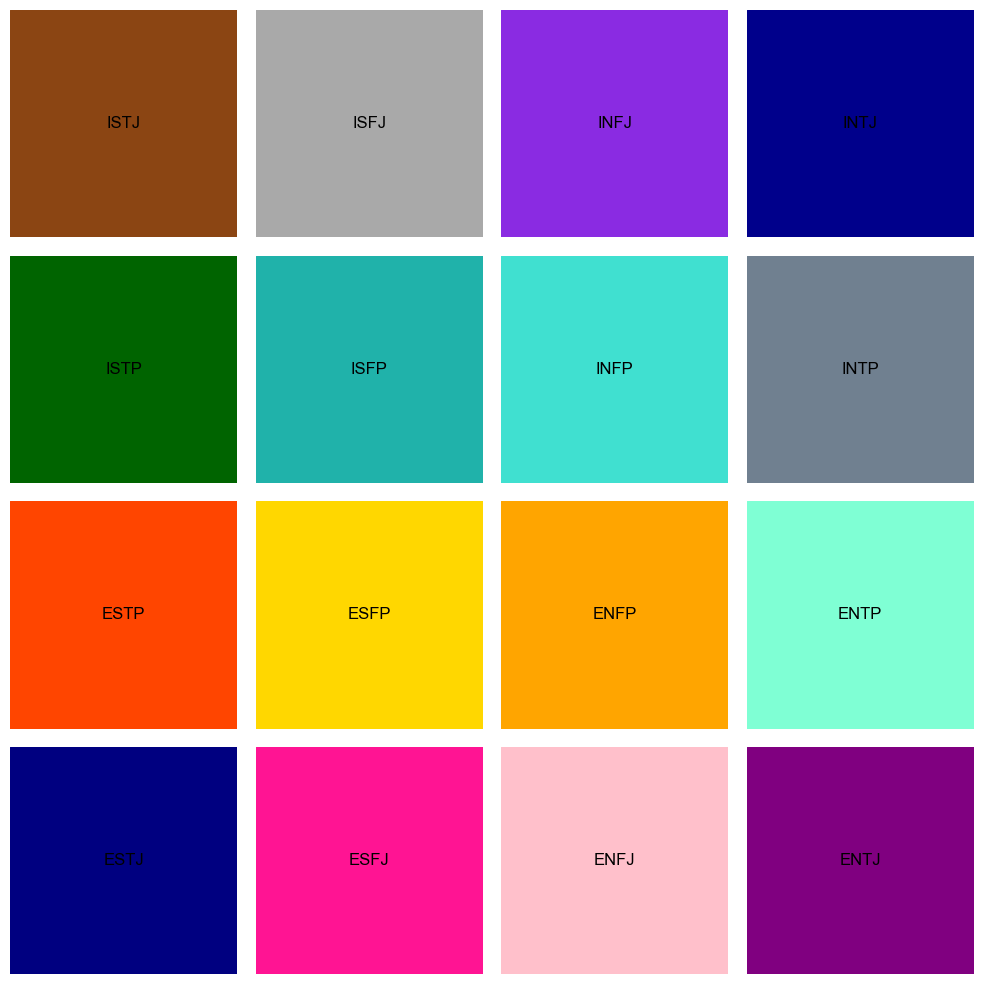

In [171]:
# Create a list of MBTI types and corresponding colors
mbti_types = list(mbti_colors.keys())
colors = list(mbti_colors.values())

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Iterate through MBTI types and colors
for i, (mbti_type, color) in enumerate(zip(mbti_types, colors)):
    row, col = divmod(i, 4)
    ax = axes[row, col]
    
    # Fill the square with the corresponding color
    ax.add_patch(plt.Rectangle((0, 0), 1, 1, color=color))
    
    # Add the MBTI type label in the middle of the square
    ax.text(0.5, 0.5, mbti_type, fontsize=12, ha='center', va='center', color='black')
    
    # Remove axis labels and ticks
    ax.axis('off')

# Adjust layout
plt.tight_layout()

# Show the visualization
plt.show()

## Type Count
Insight:
- more posts from "I" 
- least from "E" for the most part
- INFP highest, ESTJ lowest –  the exact opposites of each other

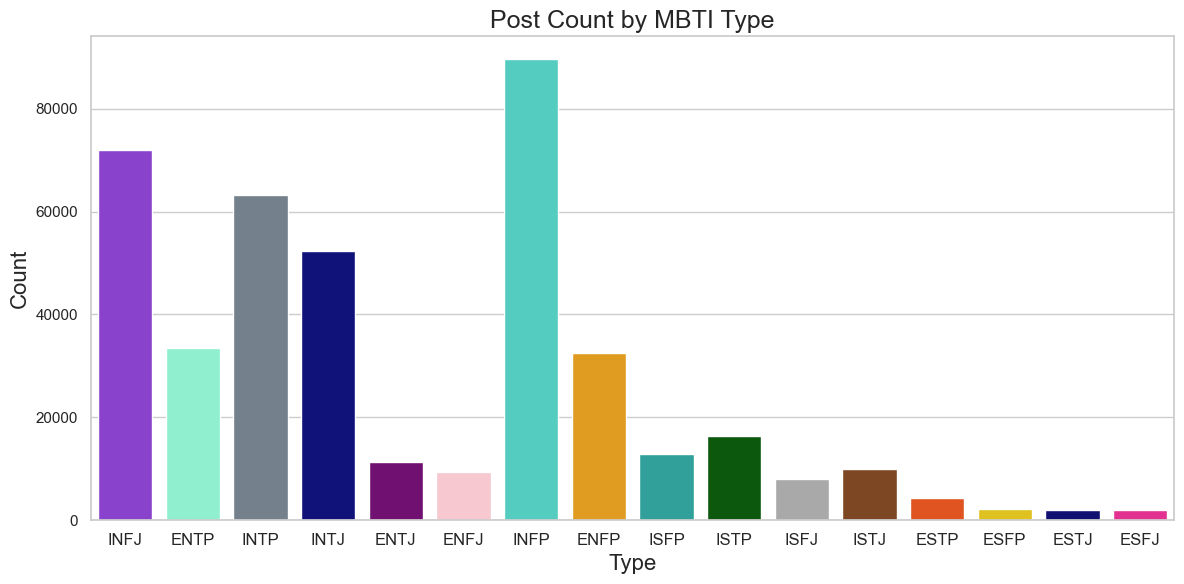

In [172]:
# Create the countplot with custom colors
plt.figure(figsize=(12, 6))  # Set the figure size
sns.countplot(x='type', data=df, palette=[mbti_colors[mbti_type] for mbti_type in df['type'].unique()])

# Customize plot labels and title
plt.xlabel('Type', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Post Count by MBTI Type', fontsize=18)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=0, ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

## Distribution of 'E/I', 'S/N', 'T/F', 'J/P'
Main insights:
- more E, S, T, J vs I, N, F, P
- almost 3x as much E as I

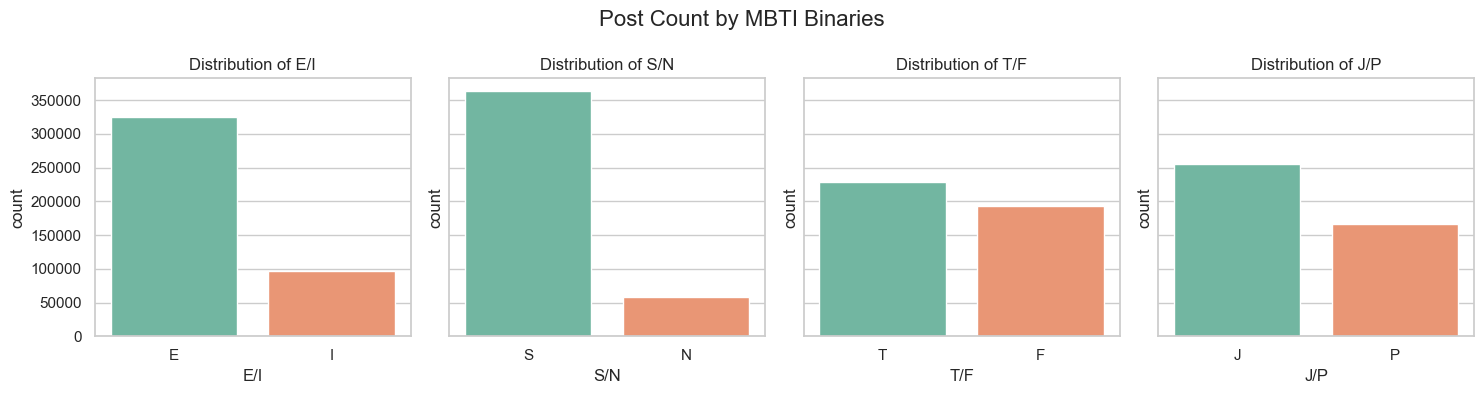

In [173]:
# Create a reference variable for MBTI binaries
mbti_binaries = ['E/I', 'S/N', 'T/F', 'J/P']

fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharey=True)
plt.suptitle('Post Count by MBTI Binaries', fontsize=16)  # Add an overall title

# Iterate through the columns and create relative bar plots in each subplot
for i, mbti_binary in enumerate(mbti_binaries):
    sns.countplot(x=mbti_binary, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribution of {mbti_binary}')
    axes[i].set_xticklabels([mbti_binary[0], mbti_binary[2]])  # Set x-axis labels

plt.tight_layout()
plt.show()

## Post Clean

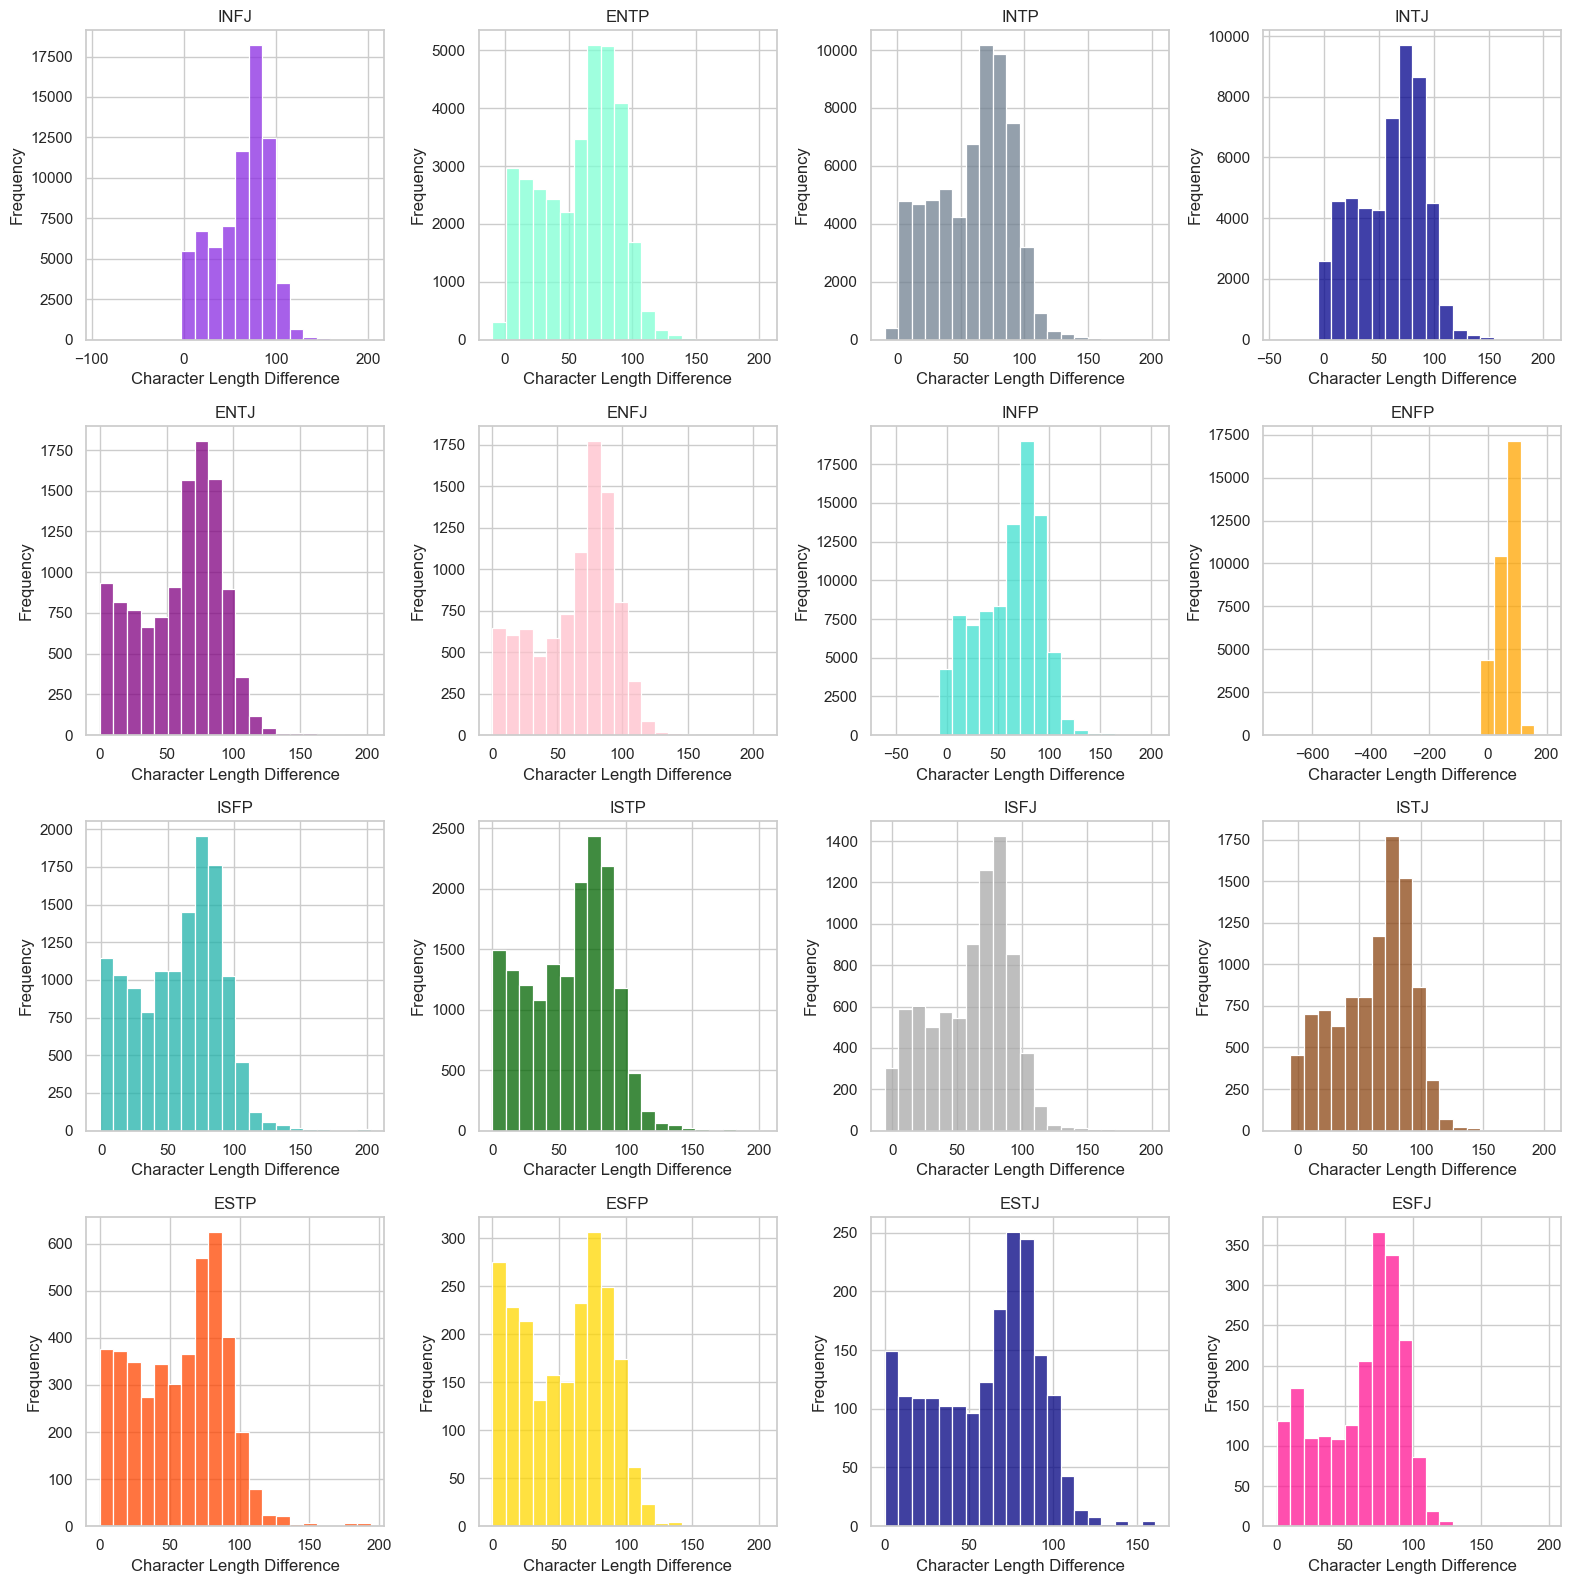

In [79]:
# Create a copy of the original DataFrame
df_copy = df.copy()

# Calculate character length difference and store it in a new column
df_copy['char_length_difference'] = df_copy['post'].str.len() - df_copy['post_clean'].str.len()

# Create a 4x4 subplot
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

# Iterate through each MBTI type and create a histogram
for i, mbti_type in enumerate(df_copy['type'].unique()):
    row, col = divmod(i, 4)
    ax = axes[row, col]
    
    # Filter data for the specific MBTI type
    data_subset = df_copy[df_copy['type'] == mbti_type]
    
    # Create a histogram
    sns.histplot(data=data_subset, x='char_length_difference', bins=20, ax=ax, color=mbti_colors[mbti_type])
    ax.set_title(mbti_type)
    ax.set_xlabel('Character Length Difference')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the subplot
plt.show()

## Readability

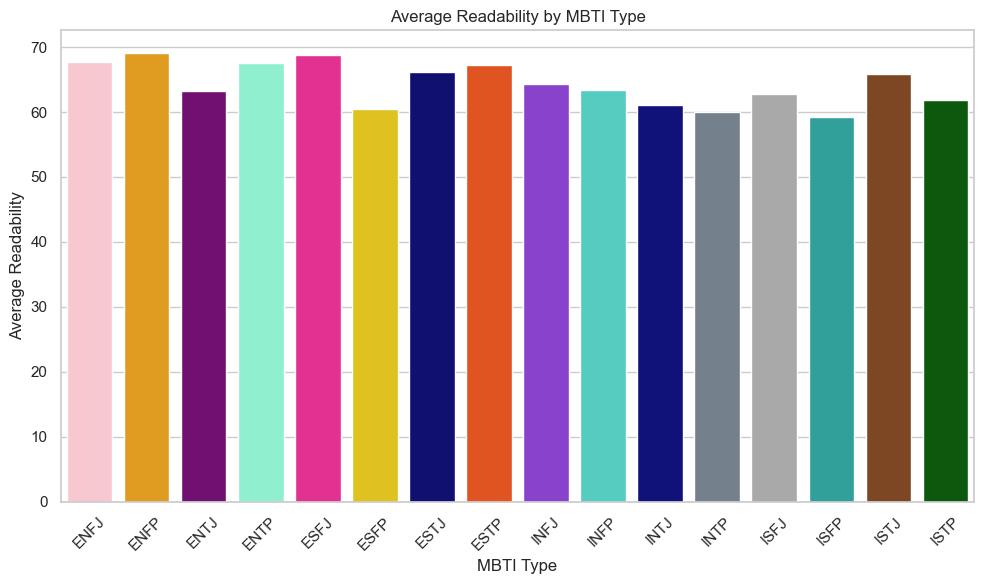

In [75]:
# Calculate average readability and sort by values in descending order
avg_readability = df.groupby('type')['readability'].mean()

# Create a color palette based on MBTI types
colors = [mbti_colors[mbti_type] for mbti_type in avg_readability.index]

# Set the seaborn style
sns.set(style="whitegrid")

# Create the barplot with the specified color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_readability.index, y=avg_readability.values, palette=colors)
plt.xlabel('MBTI Type')
plt.ylabel('Average Readability')
plt.title('Average Readability by MBTI Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

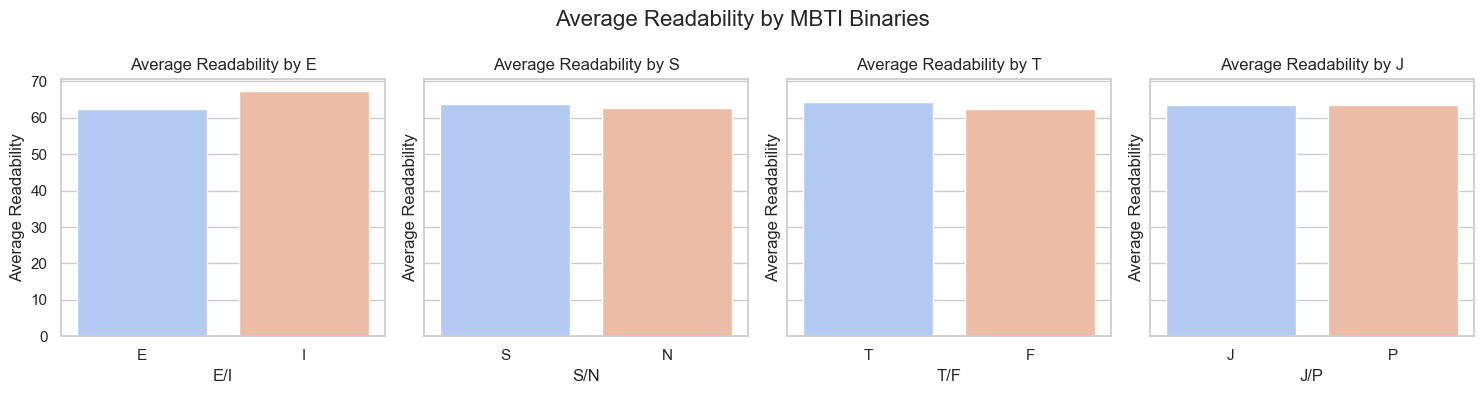

In [174]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharey=True)
plt.suptitle('Average Readability by MBTI Binaries', fontsize=16)  # Add an overall title

for i, mbti_binary in enumerate(mbti_binaries):
    # Calculate the average readability for each subgroup (0 and 1)
    avg_readability = df.groupby([mbti_binary])['readability'].mean().reset_index()
    
    # Create a barplot for each MBTI binary
    sns.barplot(x=mbti_binary, y='readability', data=avg_readability, ax=axes[i], palette='coolwarm')
    
    # Set subplot title and labels
    axes[i].set_title(f'Average Readability by {mbti_binary[0]}')
    axes[i].set_xticklabels([mbti_binary[0], mbti_binary[2]])  # Set x-axis labels
    axes[i].set_ylabel('Average Readability')

plt.tight_layout()
plt.show()

## Post Length Boxplot
Main Insight:
- greater range with INFJ and ENTJ
- ENFP has a large outlier?

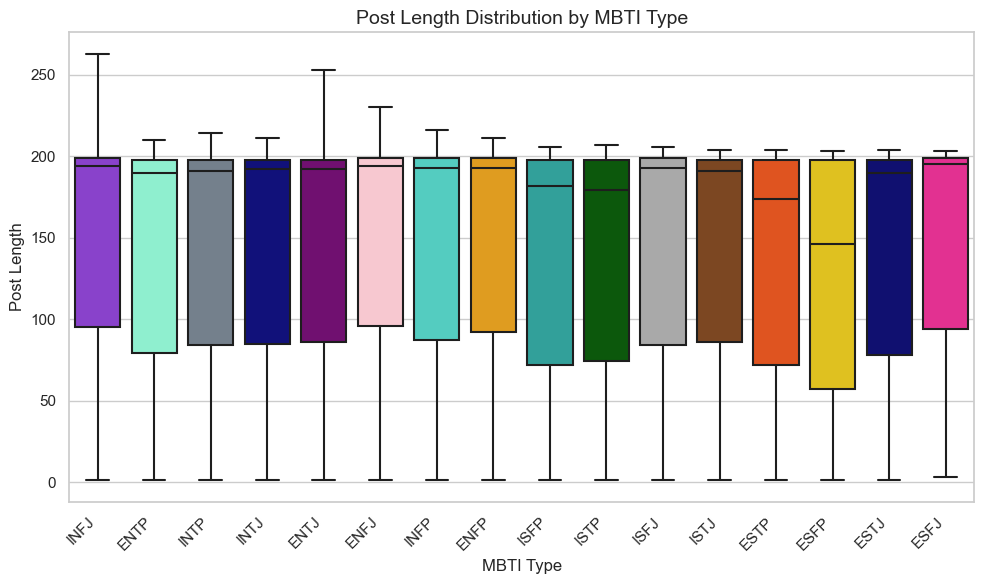

In [175]:
# Create the boxplot with adjusted colors
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(x='type', y='post_length', data=df, palette=[mbti_colors[mbti_type] for mbti_type in df['type'].unique()])

# Customize plot labels and title
plt.xlabel('MBTI Type', fontsize=12)
plt.ylabel('Post Length', fontsize=12)
plt.title('Post Length Distribution by MBTI Type', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

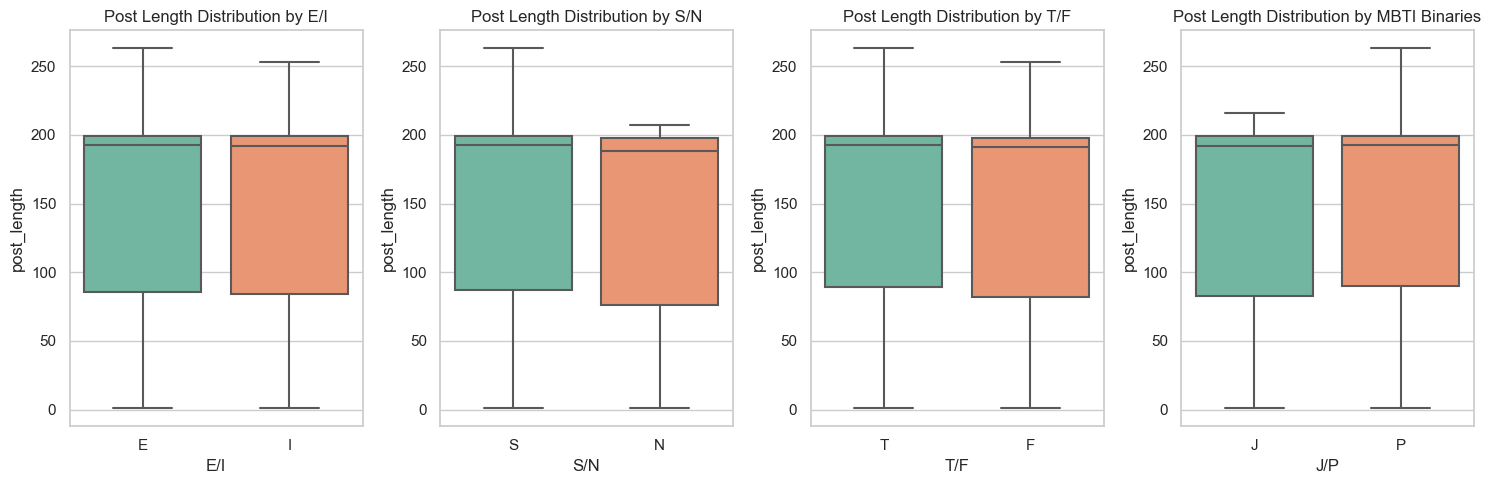

In [176]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

MBTI_binaries = ['E/I', 'S/N', 'T/F', 'J/P']

for i, mbti_binary in enumerate(MBTI_binaries):
    # Create a boxplot for post length per subgroup (0 and 1)
    sns.boxplot(x=mbti_binary, y='post_length', data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Post Length Distribution by {mbti_binary}')
    axes[i].set_xticklabels([mbti_binary[0], mbti_binary[2]])  # Set x-axis labels

plt.tight_layout()
plt.title('Post Length Distribution by MBTI Binaries')
plt.show()

## Post_caps_over_50_percent

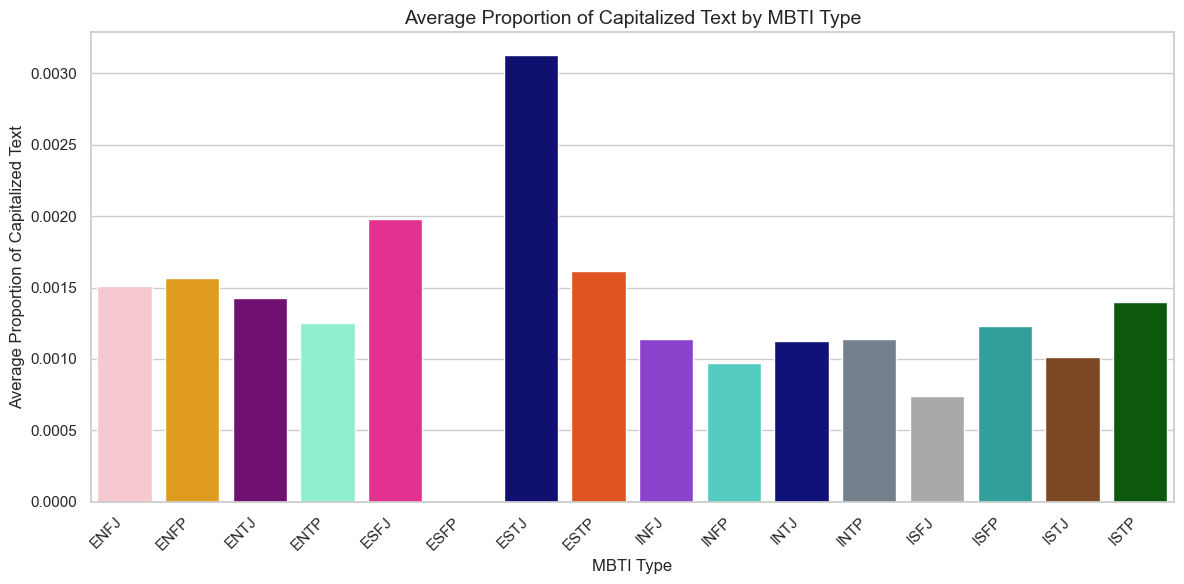

In [177]:
# Calculate the average 'post_caps_over_50_percent' per type
average_caps_over_50_percent = df.groupby('type')['post_caps_over_50_percent'].mean().reset_index()

# Create a bar plot for the average posts with over 50% capitalized text
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x='type', y='post_caps_over_50_percent', data=average_caps_over_50_percent, palette=[mbti_colors[mbti_type] for mbti_type in average_caps_over_50_percent['type']])

# Customize plot labels and title
plt.xlabel('MBTI Type', fontsize=12)
plt.ylabel('Average Proportion of Capitalized Text', fontsize=12)
plt.title('Average Proportion of Capitalized Text by MBTI Type', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

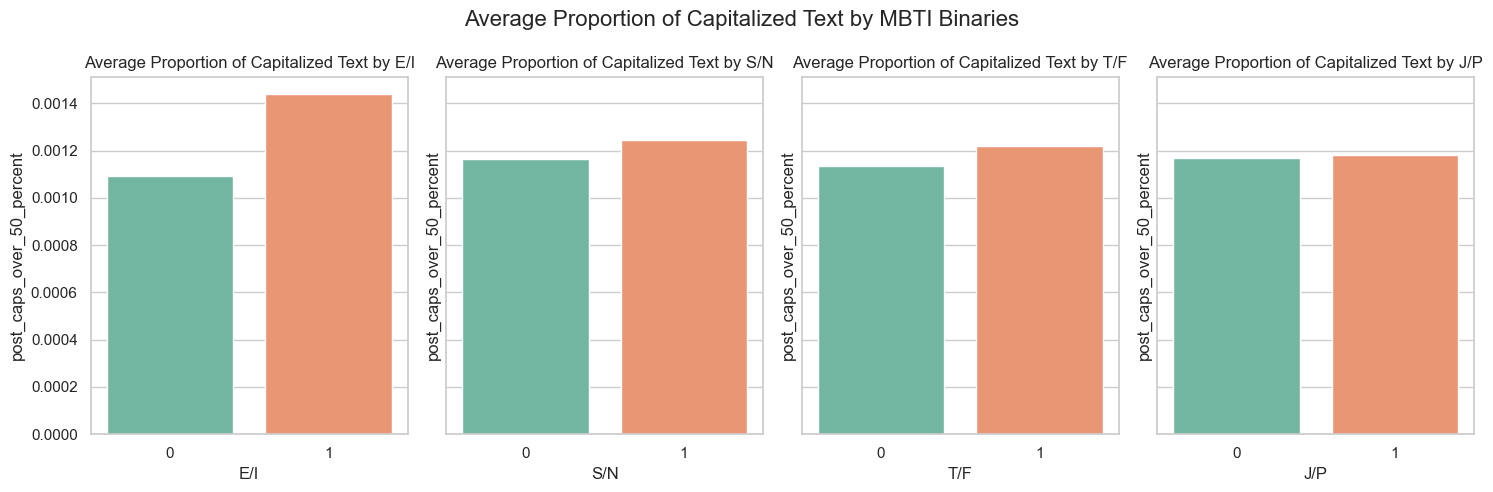

In [178]:
MBTI_binaries = ['E/I', 'S/N', 'T/F', 'J/P']

# Create subplots for each binary
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)

for i, mbti_binary in enumerate(MBTI_binaries):
    # Calculate the average proportion of capitalized text per binary
    average_caps_by_binary = df.groupby(mbti_binary)['post_caps_over_50_percent'].mean().reset_index()
    
    # Create a bar plot for the average proportion of capitalized text by binary
    sns.barplot(x=mbti_binary, y='post_caps_over_50_percent', data=average_caps_by_binary, ax=axes[i], palette='Set2')
    
    # Set x-axis labels and title
    axes[i].set_title(f'Average Proportion of Capitalized Text by {mbti_binary}')
    axes[i].set_xlabel(f'{mbti_binary}', fontsize=12)

fig.suptitle('Average Proportion of Capitalized Text by MBTI Binaries', fontsize=16)
plt.tight_layout()
plt.show()


## Emotion probability vector
Main insight:
- not that much difference
- every type is likely to make a post that evokes all emotions

In [17]:
df

,type,post,post_clean,E/I,S/N,T/F,J/P,post_length,readability,post_caps_over_50_percent,...,has_personalitycafe_url,has_other_url,self_reference,references_others,anger,fear,joy,love,sadness,surprise
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw,,0,0,0,1,43,-132.59,False,...,0,0,0,0,0.11,0.15,0.71,0.00,0.03,0.00
1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,,0,0,0,1,61,-640.19,False,...,0,0,0,0,0.11,0.15,0.71,0.00,0.03,0.00
2,INFJ,enfp and intj moments https://www.youtube.com...,enfp intj moment sportscenter top ten play prank,0,0,0,1,151,48.47,False,...,0,0,0,2,0.15,0.15,0.64,0.02,0.04,0.00
3,INFJ,What has been the most life-changing experienc...,ha lifechanging experience life,0,0,0,1,61,78.25,False,...,0,0,0,0,0.10,0.09,0.68,0.02,0.10,0.01
4,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,repeat today,0,0,0,1,117,4.14,False,...,0,0,0,0,0.12,0.15,0.67,0.00,0.06,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421752,INFP,I was going to close my facebook a few months ...,wa going close facebook month back well wantin...,0,0,0,0,193,56.26,False,...,0,0,0,0,0.12,0.10,0.54,0.00,0.23,0.01
421753,INFP,30 Seconds to Mars - All of my collections. It...,second mar collection seems fitting mood right,0,0,0,0,85,96.69,False,...,0,0,0,0,0.13,0.14,0.61,0.02,0.10,0.00
421754,INFP,"I have seen it, and i agree. I did actually th...",seen agree actually think first time watched m...,0,0,0,0,199,86.03,False,...,0,0,0,0,0.06,0.10,0.66,0.04,0.13,0.01
421755,INFP,Ok so i have just watched Underworld 4 (Awaken...,ok watched underworld awakening must say wa re...,0,0,0,0,200,84.51,False,...,0,0,0,0,0.02,0.06,0.84,0.00,0.08,0.00


<Figure size 1200x600 with 0 Axes>

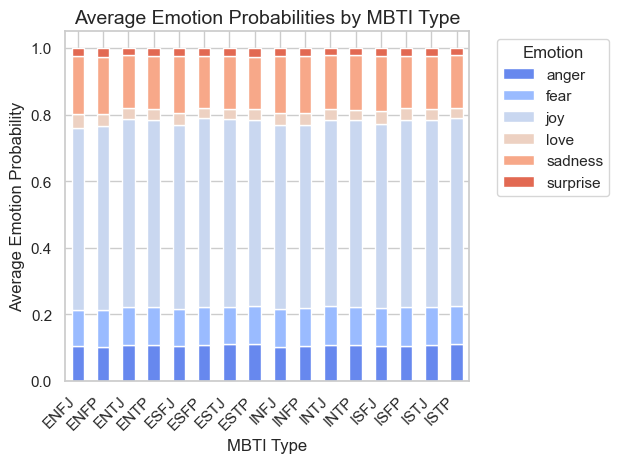

In [18]:
# Version that creates a stacked bar chart of the emotion probability vector for each mbti type
subset_df = df[['type', 'anger', 'fear', 'joy', 'love', 'sadness', 'surprise']]

# Aggregate data to compute average emotion values for each type
agg_df = subset_df.groupby('type').mean()

# Create stacked bar charts for each type
emotions_palette = sns.color_palette("coolwarm", 6)  # Use a color palette suitable for emotions (6 emotions)
emotions = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

plt.figure(figsize=(12, 6))
agg_df.plot(kind='bar', stacked=True, color=emotions_palette)

plt.xlabel('MBTI Type', fontsize=12)
plt.ylabel('Average Emotion Probability', fontsize=12)
plt.title('Average Emotion Probabilities by MBTI Type', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


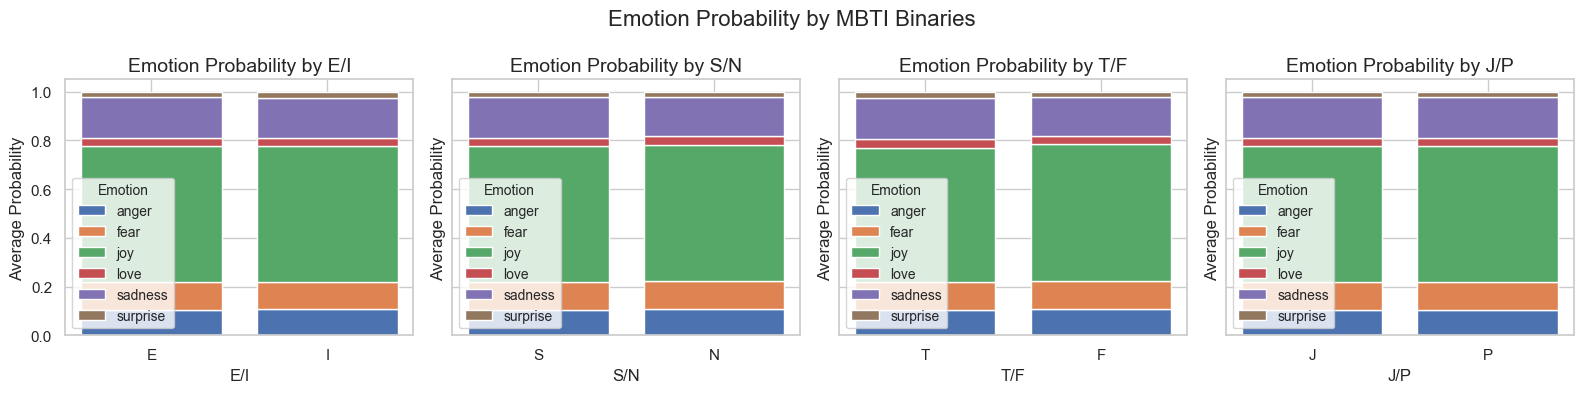

In [21]:
emotions = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
emotions_df = df[mbti_binaries + emotions]

# Create a 1x4 subplot with shared y-axis
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
fig.suptitle('Emotion Probability by MBTI Binaries', fontsize=16)

for i, ax in enumerate(axes):
    mbti_binary = mbti_binaries[i]
    
    # Group the DataFrame by the current MBTI binary and calculate the mean
    agg_df = emotions_df.groupby(mbti_binary, as_index=False).mean()
    
    x_positions = np.arange(len(agg_df[mbti_binary]))
    emotions_values = [agg_df.loc[agg_df[mbti_binary] == value, emotions].values[0] for value in agg_df[mbti_binary]]
    
    bottom = np.zeros(len(x_positions))
    
    for j, emotion in enumerate(emotions):
        ax.bar(x_positions, [values[j] for values in emotions_values], label=emotion, bottom=bottom)
        bottom += [values[j] for values in emotions_values]
    
    ax.set_xlabel(f'{mbti_binary}', fontsize=12)
    ax.set_xticks(x_positions)  # Set x-axis ticks
    ax.set_xticklabels([mbti_binary[0], mbti_binary[2]])  # Set x-axis labels
    ax.set_ylabel('Average Probability', fontsize=12)
    ax.set_title(f'Emotion Probability by {mbti_binary}', fontsize=14)
    ax.legend(title='Emotion', title_fontsize=10, fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 1])

# Show the plot
plt.show()

## URLs

In [148]:
df_grouped

,type,has_youtu_url,has_tumblr_url,has_imgur_url,has_personalitycafe_url,has_other_url
0,ENFJ,157,7,3,3,79
1,ENFP,530,38,14,13,244
2,ENTJ,149,13,7,5,133
3,ENTP,366,23,29,13,298
4,ESFJ,16,1,1,1,6
5,ESFP,37,6,1,1,42
6,ESTJ,20,2,1,1,18
7,ESTP,81,6,0,8,48
8,INFJ,1882,77,55,27,571
9,INFP,2802,91,74,33,780


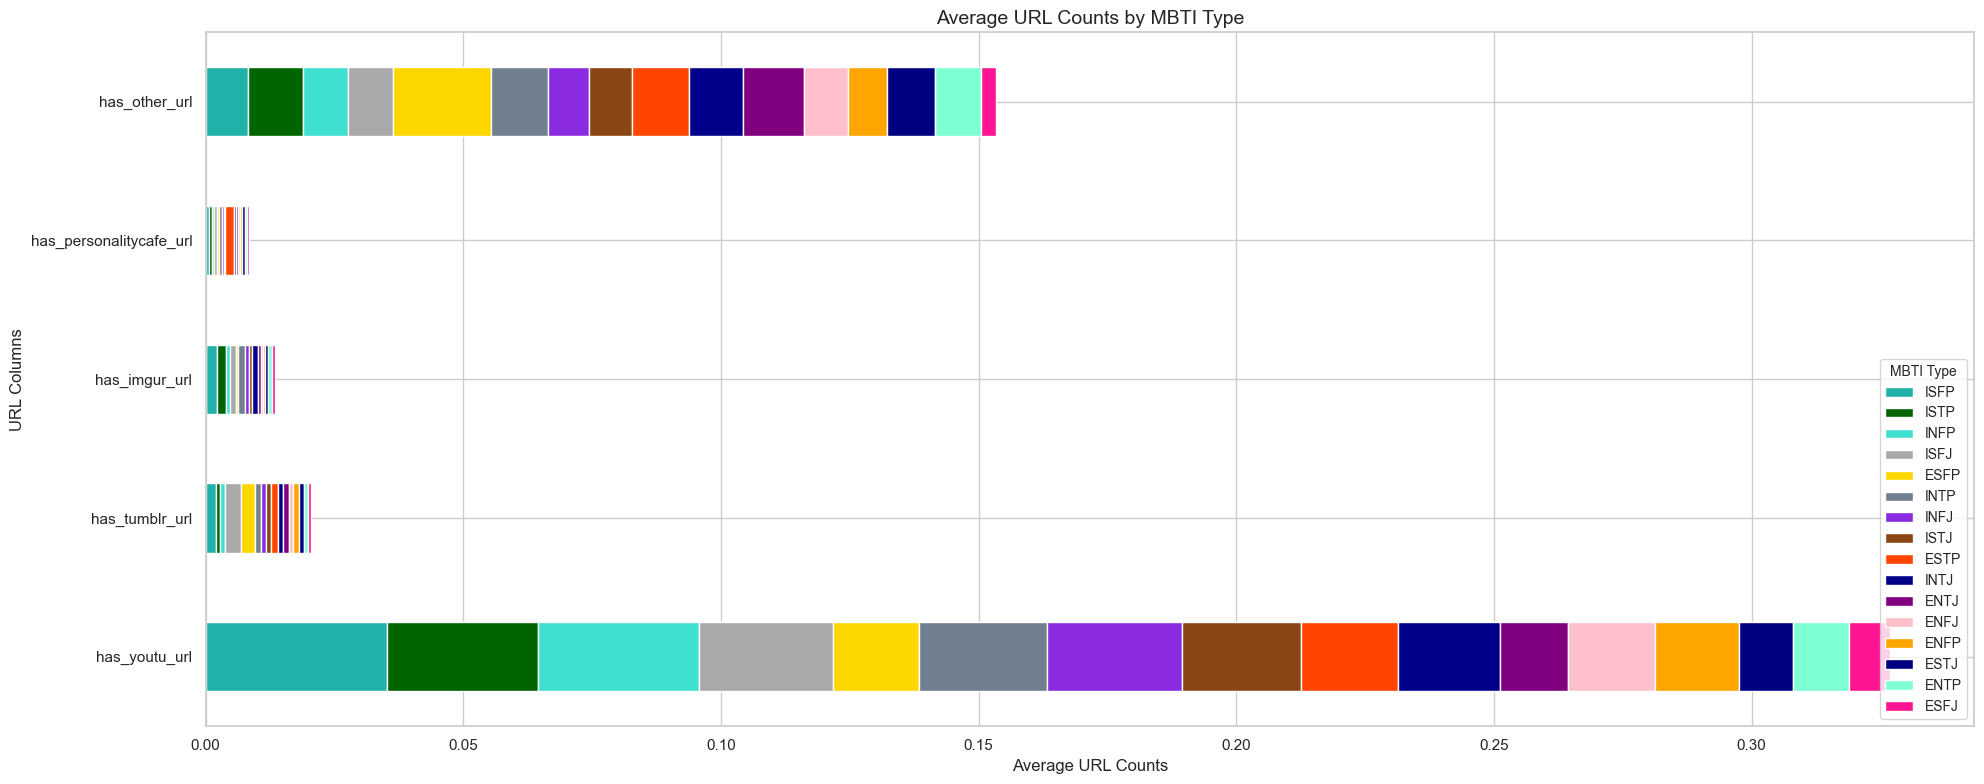

In [179]:
import matplotlib.colors as mcolors

# Define the columns to visualize
url_columns = ['has_youtu_url', 'has_tumblr_url', 'has_imgur_url', 'has_personalitycafe_url', 'has_other_url']

# Create a DataFrame subset containing only the URL columns and 'type'
df_subset = df[['type'] + url_columns]

# Group by 'type' and calculate the average values for each column
df_grouped = df_subset.groupby('type')[url_columns].mean().reset_index()

# Reorder MBTI types by the count of 1 values in descending order
ordered_types = df_grouped.set_index('type').sum(axis=1).sort_values(ascending=False).index

# Transpose the DataFrame to make it suitable for a horizontal barplot
df_grouped_transposed = df_grouped.set_index('type').T

# Create a custom colormap based on mbti_colors
colors = [mbti_colors[mbti_type] for mbti_type in ordered_types]
custom_cmap = mcolors.ListedColormap(colors)

# Create the horizontal stacked barplot with the custom colormap
df_grouped_transposed[ordered_types].plot(kind='barh', stacked=True, colormap=custom_cmap, figsize=(20, 8))

# Customize plot labels and title
plt.xlabel('Average URL Counts', fontsize=12)
plt.ylabel('URL Columns', fontsize=12)
plt.title('Average URL Counts by MBTI Type', fontsize=14)
plt.tight_layout()
plt.legend(title='MBTI Type', title_fontsize=10, fontsize=10, loc='lower right')
plt.show()

In [23]:
df[df['E/I']==0][url_columns].sum()

has_youtu_url              8671
has_tumblr_url              354
has_imgur_url               350
has_personalitycafe_url     131
has_other_url              3041
dtype: int64

In [24]:
df_grouped_transposed

type,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
has_youtu_url,157,530,149,366,16,37,20,81,1882,2802,1036,1574,211,458,228,480
has_tumblr_url,7,38,13,23,1,6,2,6,77,91,48,64,26,27,10,11
has_imgur_url,3,14,7,29,1,1,1,0,55,74,66,83,9,28,5,30
has_personalitycafe_url,3,13,5,13,1,1,1,8,27,33,17,29,5,9,2,9
has_other_url,79,244,133,298,6,42,18,48,571,780,557,697,71,108,82,175


In [144]:
df_binaries

,mbti_binaries,has_youtu_url,has_tumblr_url,has_imgur_url,has_personalitycafe_url,has_other_url
0,E,8671,354,350,131,3041
1,I,1356,96,56,45,868
0,S,8496,361,331,140,3359
1,N,1531,89,75,36,550
0,T,6093,273,185,92,1901
1,F,3934,177,221,84,2008
0,J,6328,266,259,115,2392
1,P,3699,184,147,61,1517


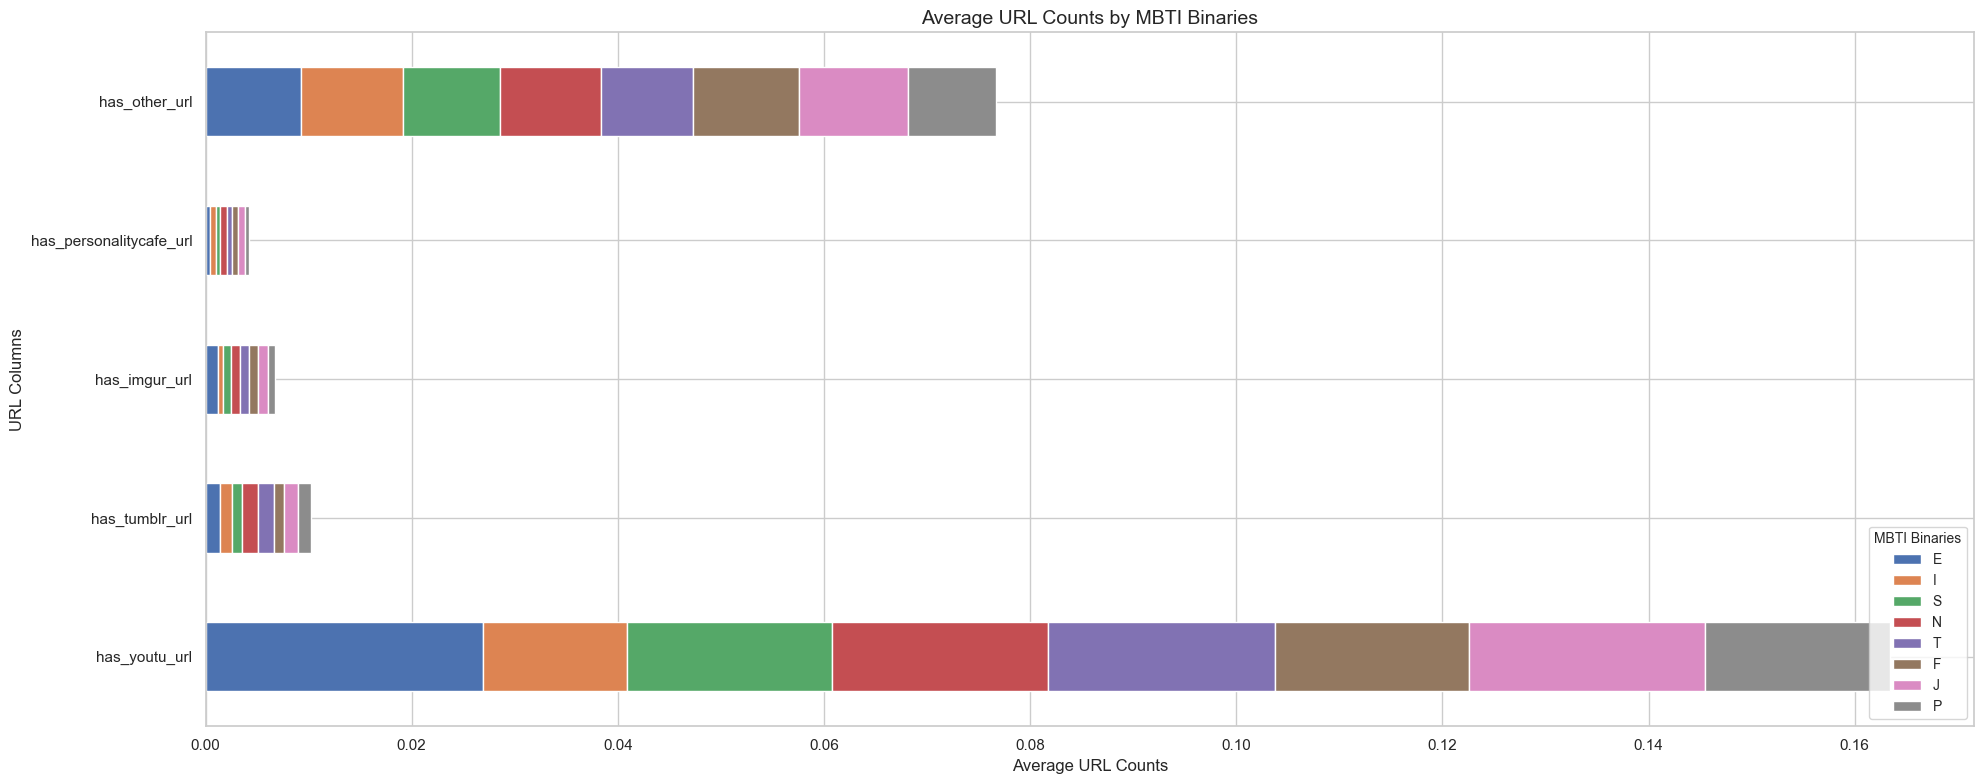

In [180]:
# Define the columns to visualize
url_columns = ['has_youtu_url', 'has_tumblr_url', 'has_imgur_url', 'has_personalitycafe_url', 'has_other_url']

# Create a DataFrame subset containing only the URL columns and the 8 MBTI binaries
df_subset = df[mbti_binaries + url_columns]

# Group by the 8 MBTI binaries and calculate the average values for each column
df_grouped = df_subset.groupby(mbti_binaries)[url_columns].mean().reset_index()

df_binaries = pd.DataFrame()
for mbti_binary in mbti_binaries:
    temp = df_grouped.groupby(mbti_binary).mean().reset_index().drop(mbti_binaries, axis=1)
    temp.insert(0, 'mbti_binaries', [mbti_binary[0], mbti_binary[2]])
    df_binaries = pd.concat([df_binaries, temp])

# Transpose the DataFrame to make it suitable for a horizontal barplot
df_grouped_transposed = df_binaries.set_index('mbti_binaries').T

# Create the horizontal stacked barplot with the custom colormap
df_grouped_transposed.plot(kind='barh', stacked=True, figsize=(20, 8))

# Customize plot labels and title
plt.xlabel('Average URL Counts', fontsize=12)
plt.ylabel('URL Columns', fontsize=12)
plt.title('Average URL Counts by MBTI Binaries', fontsize=14)
plt.tight_layout()
plt.legend(title='MBTI Binaries', title_fontsize=10, fontsize=10, loc='lower right')
plt.show()

## Self References

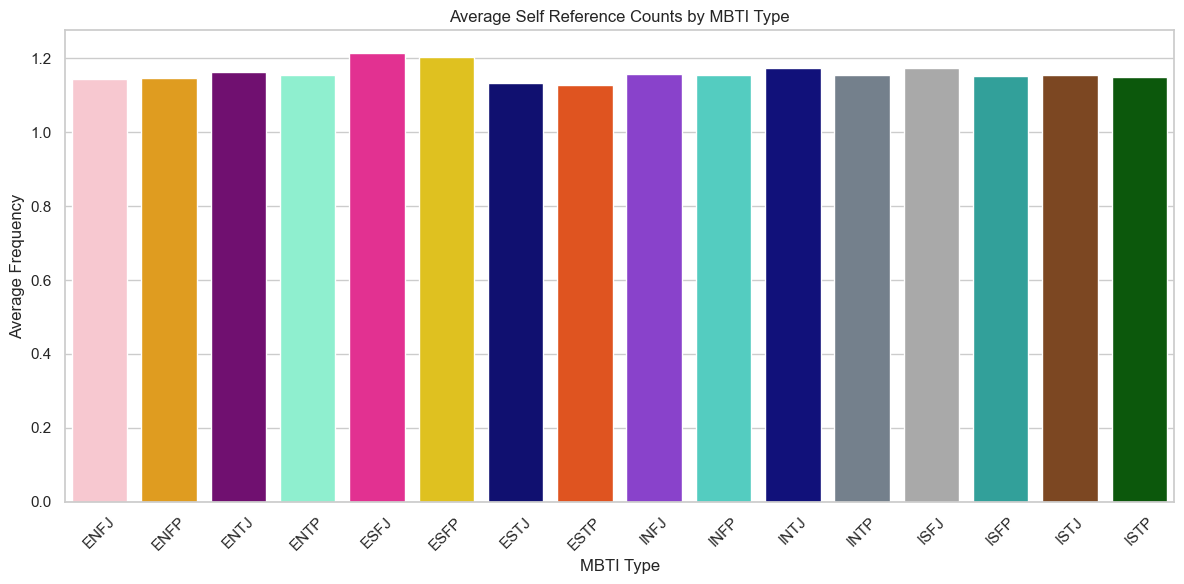

In [181]:
# Filter the DataFrame for 'self_reference' values greater than or equal to 1
self_reference = df[df['self_reference'] >= 1].copy()
self_reference_avg = self_reference.groupby('type')['self_reference'].mean()  # Calculate the average self_reference counts

# Create a color palette based on MBTI types
self_reference_colors = [mbti_colors[mbti_type] for mbti_type in self_reference_avg.index]

fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar plot for 'self_reference' based on MBTI types with custom colors
sns.barplot(x=self_reference_avg.index, y=self_reference_avg.values, palette=self_reference_colors)
plt.title('Average Self Reference Counts by MBTI Type')
plt.xlabel('MBTI Type')
plt.ylabel('Average Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

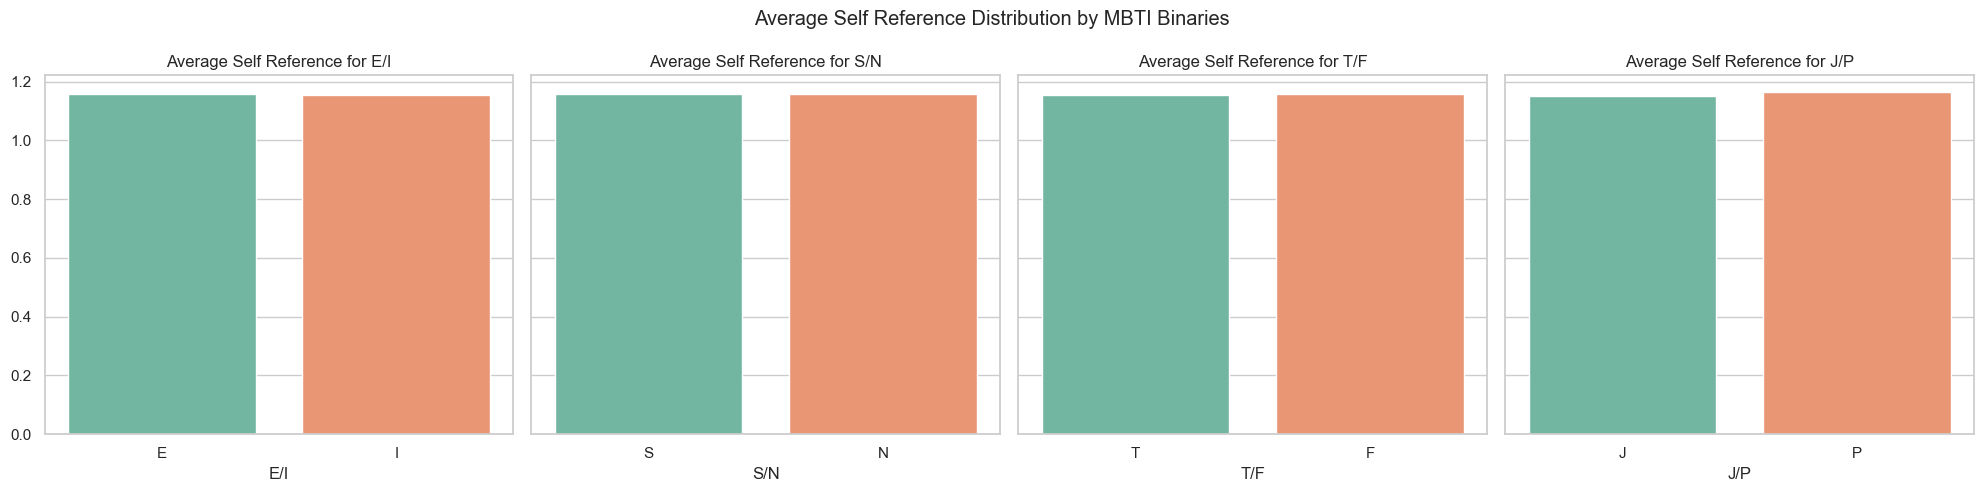

In [182]:
import matplotlib.ticker as ticker
import warnings

# Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning)

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i, mbti_binary in enumerate(mbti_binaries):
    # Filter the DataFrame for 'self_reference' values greater than or equal to 1
    filtered_df = df[df['self_reference'] >= 1]
    
    # Group by the binary category and calculate the average
    avg_self_reference = filtered_df.groupby(mbti_binary)['self_reference'].mean()
    
    # Create a stacked bar chart for 'self_reference' based on unique values
    sns.barplot(x=avg_self_reference.index, y=avg_self_reference.values, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Average Self Reference for {mbti_binary}')
    
    # Set x-axis labels
    axes[i].set_xticklabels([mbti_binary[0], mbti_binary[2]])  # Set x-axis labels

fig.suptitle('Average Self Reference Distribution by MBTI Binaries')
plt.tight_layout()
plt.show()

## References Others

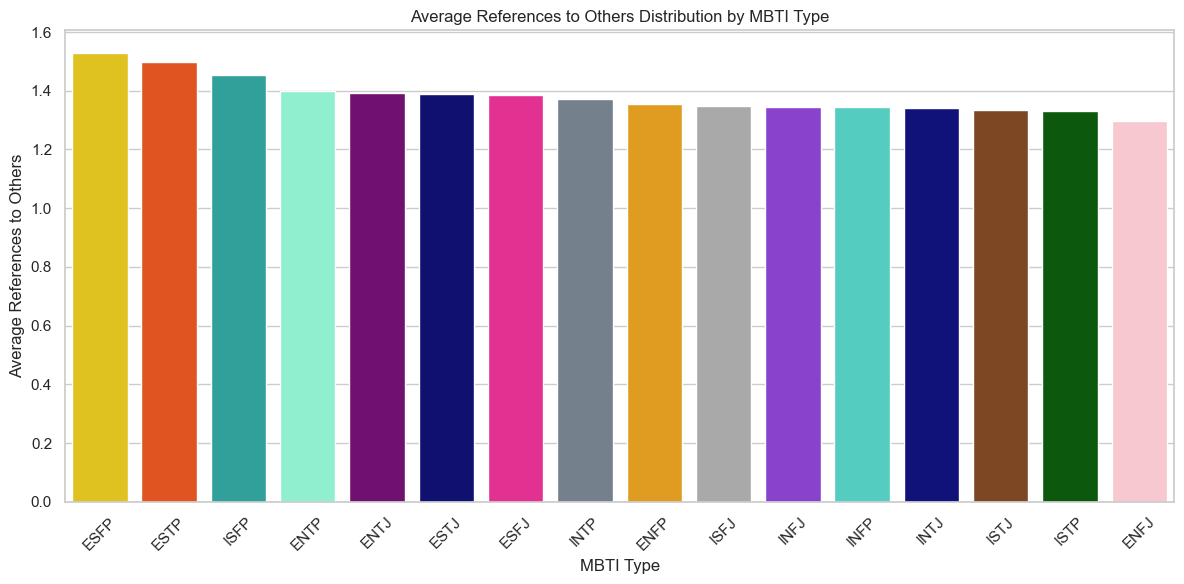

In [187]:
import warnings

# Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning)

fig, ax = plt.subplots(figsize=(12, 6))

# Calculate the average references to others distribution for each MBTI type
avg_references_others = df[df['references_others'] >= 1].groupby('type')['references_others'].mean().sort_values(ascending=False)

# Create a color palette based on MBTI types
references_others_colors = [mbti_colors[mbti_type] for mbti_type in avg_references_others.index]

# Create a bar plot for the average references to others distribution
sns.barplot(x=avg_references_others.index, y=avg_references_others.values, palette=references_others_colors)
plt.title('Average References to Others Distribution by MBTI Type')
plt.xlabel('MBTI Type')
plt.ylabel('Average References to Others')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

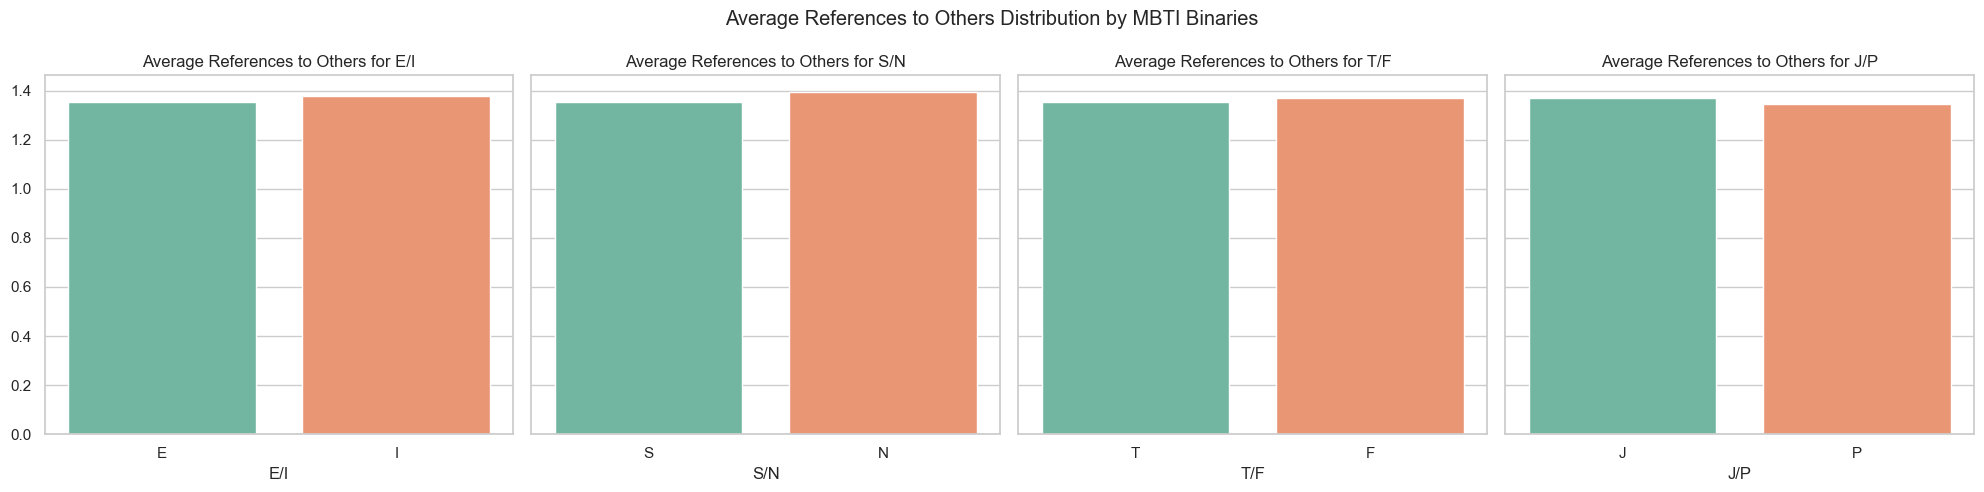

In [189]:
import matplotlib.ticker as ticker
import warnings

# Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning)

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i, mbti_binary in enumerate(mbti_binaries):
    # Filter the DataFrame for 'references_others' values greater than or equal to 1
    filtered_df = df[df['references_others'] >= 1]
    
    # Group by the binary category and calculate the average
    avg_references_others = filtered_df.groupby(mbti_binary)['references_others'].mean()
    
    # Create a bar chart for 'references_others' based on unique values
    sns.barplot(x=avg_references_others.index, y=avg_references_others.values, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Average References to Others for {mbti_binary}')
    
    # Set x-axis labels
    axes[i].set_xticklabels([mbti_binary[0], mbti_binary[2]])  # Set x-axis labels

fig.suptitle('Average References to Others Distribution by MBTI Binaries')
plt.tight_layout()
plt.show()

## Combined References

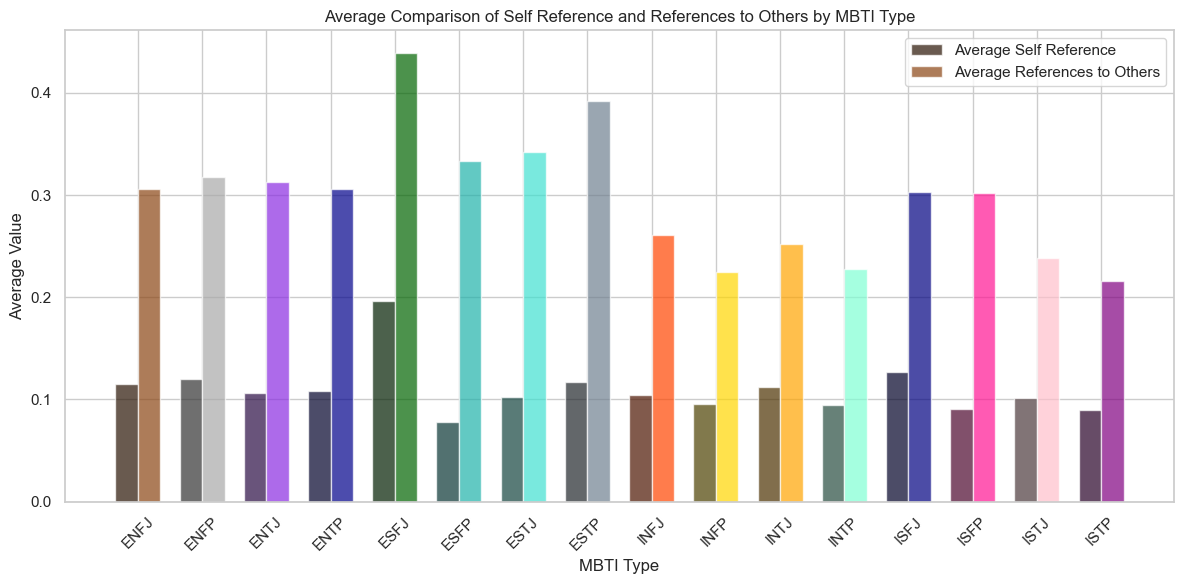

In [197]:
import matplotlib.ticker as ticker
import warnings

# Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning)

fig, ax = plt.subplots(figsize=(12, 6))

# Filter the DataFrame for 'self_reference' and 'references_others' values greater than or equal to 1
self_reference_df = df.copy()
references_others_df = df.copy()

# Calculate the average 'self_reference' and 'references_others' values for each MBTI type
avg_self_reference = self_reference_df.groupby('type')['self_reference'].mean()
avg_references_others = references_others_df.groupby('type')['references_others'].mean()

# Create a color palette based on MBTI types
self_reference_colors = [darken_color(mbti_color, 0.3) for mbti_color in mbti_colors.values()]
references_others_colors = [mbti_color for mbti_color in mbti_colors.values()]

# Width of each bar
width = 0.35

# Create bar plots for the averages of 'self_reference' and 'references_others'
x = range(len(avg_self_reference))
ax.bar(x, avg_self_reference.values, width, label='Average Self Reference', color=self_reference_colors, alpha=0.7)
ax.bar([i + width for i in x], avg_references_others.values, width, label='Average References to Others', color=references_others_colors, alpha=0.7)

plt.title('Average Comparison of Self Reference and References to Others by MBTI Type')
plt.xlabel('MBTI Type')
plt.ylabel('Average Value')
plt.xticks([i + width / 2 for i in x], avg_self_reference.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [198]:
# Create a DataFrame subset containing only the URL columns and the 8 MBTI binaries
self_reference_df = df.copy()[mbti_binaries + ['self_reference']]
references_others_df = df.copy()[mbti_binaries + ['references_others']]

# Group by the 8 MBTI binaries and average the values (1s) for each column
self_reference_groups = self_reference_df.groupby(mbti_binaries)['self_reference'].mean().reset_index()
references_others_groups = references_others_df.groupby(mbti_binaries)['references_others'].mean().reset_index()

# Create a DataFrame to store the results then iterate through each mbti_binary
self_reference_binaries = pd.DataFrame(columns=['mbti_binaries', 'sum'])
for mbti_binary in mbti_binaries:
    temp = self_reference_groups.groupby(mbti_binary).sum().reset_index().drop(mbti_binaries, axis=1)
    temp['mbti_binaries'] = [mbti_binary[0], mbti_binary[2]]
    temp = temp.rename(columns={'self_reference': 'sum'})
    self_reference_binaries = pd.concat([self_reference_binaries, temp], ignore_index=True)

# Do the same for references_others
references_others_binaries = pd.DataFrame(columns=['mbti_binaries', 'sum'])
for mbti_binary in mbti_binaries:
    temp = references_others_groups.groupby(mbti_binary).sum().reset_index().drop(mbti_binaries, axis=1)
    temp['mbti_binaries'] = [mbti_binary[0], mbti_binary[2]]
    temp = temp.rename(columns={'references_others': 'sum'})
    references_others_binaries = pd.concat([references_others_binaries, temp], ignore_index=True)

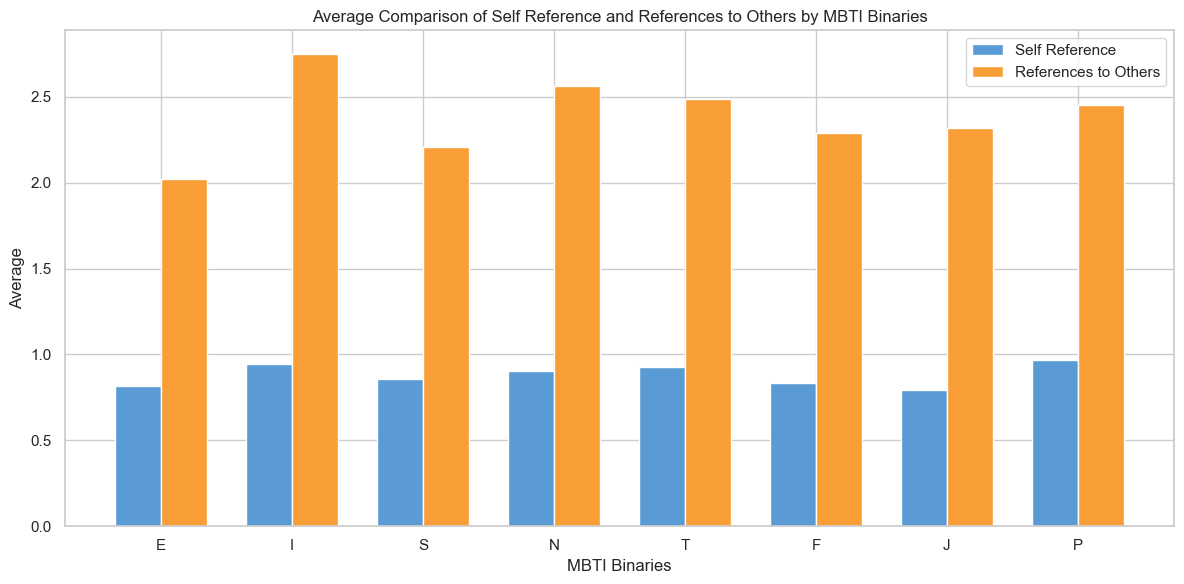

In [199]:
# Define custom colors using hexadecimal color codes
self_reference_color = '#5A9BD5'  # Blue
references_others_color = '#F99D37'  # Orange

# Create a side-by-side bar plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(self_reference_binaries))

# Plot 'Self Reference' bars
plt.bar(index, self_reference_binaries['sum'], bar_width, label='Self Reference', color=self_reference_color)

# Plot 'References to Others' bars
plt.bar(index + bar_width, references_others_binaries['sum'], bar_width, label='References to Others', color=references_others_color)

# Set labels, title, and legend
plt.xlabel('MBTI Binaries')
plt.ylabel('Average')
plt.title('Average Comparison of Self Reference and References to Others by MBTI Binaries')
plt.xticks(index + bar_width / 2, self_reference_binaries['mbti_binaries'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Word Lookup

In [ ]:
# # Word Lookup
# mbti_2017.lookup('hello', 'post_clean')

## Find Most Predictive Words

# Approach #1: CountVectorizer
Create a term-document matrix with CountVectorizer and train a predictive model to get probabilities for each word.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

# Create a term-document matrix with CountVectorizer
vectorizer = CountVectorizer(min_df=1000)
X = vectorizer.fit_transform(df['post_clean'])
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['type'])

In [12]:
# Train a Multinomial Naive Bayes model
classifier = MultinomialNB()
classifier.fit(X, y)

# Create an identity matrix with the vocabulary size
identity_matrix = np.eye(X.shape[1])

# Use the model to predict on the identity matrix
word_probabilities = classifier.predict_proba(identity_matrix)

In [13]:
label_encoder.classes_

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [14]:
# Get the mapping of class numbers to original labels (MBTI types)
class_number_to_type = {class_number: original_label for class_number, original_label in enumerate(label_encoder.classes_)}

# Print the mapping
print("Class Number to MBTI Type Mapping:")
for class_number, mbti_type in class_number_to_type.items():
    print(f"Class Number {class_number}: MBTI Type {mbti_type}")

Class Number to MBTI Type Mapping:
Class Number 0: MBTI Type ENFJ
Class Number 1: MBTI Type ENFP
Class Number 2: MBTI Type ENTJ
Class Number 3: MBTI Type ENTP
Class Number 4: MBTI Type ESFJ
Class Number 5: MBTI Type ESFP
Class Number 6: MBTI Type ESTJ
Class Number 7: MBTI Type ESTP
Class Number 8: MBTI Type INFJ
Class Number 9: MBTI Type INFP
Class Number 10: MBTI Type INTJ
Class Number 11: MBTI Type INTP
Class Number 12: MBTI Type ISFJ
Class Number 13: MBTI Type ISFP
Class Number 14: MBTI Type ISTJ
Class Number 15: MBTI Type ISTP


In [15]:
# Create a DataFrame with the vocabulary and probabilities for each MBTI type
vocab_probabilities_df = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    **{f'probability_{class_name}': probs for class_name, probs in zip(label_encoder.classes_, word_probabilities.T)}
})

vocab_probabilities_df

,word,probability_ENFJ,probability_ENFP,probability_ENTJ,probability_ENTP,probability_ESFJ,probability_ESFP,probability_ESTJ,probability_ESTP,probability_INFJ,probability_INFP,probability_INTJ,probability_INTP,probability_ISFJ,probability_ISFP,probability_ISTJ,probability_ISTP
0,ability,0.026888,0.068498,0.026599,0.081473,0.004890,0.004068,0.000625,0.009648,0.150691,0.187496,0.142512,0.192694,0.013369,0.023477,0.022900,0.044172
1,able,0.021392,0.070894,0.029936,0.073183,0.003242,0.005124,0.004727,0.009467,0.199487,0.208939,0.130520,0.141940,0.017163,0.023088,0.021762,0.039136
2,absolutely,0.023958,0.078701,0.027251,0.085305,0.004495,0.003020,0.004776,0.007368,0.188272,0.207720,0.110104,0.137860,0.022044,0.026147,0.029959,0.043020
3,accept,0.018141,0.065612,0.025691,0.083260,0.005737,0.005369,0.007429,0.012735,0.175271,0.226661,0.127743,0.149105,0.012834,0.024103,0.029389,0.030920
4,accurate,0.023712,0.061554,0.034832,0.085124,0.006341,0.009495,0.005839,0.009759,0.165070,0.182735,0.151636,0.151231,0.017731,0.031968,0.020789,0.042182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,young,0.022498,0.077030,0.023816,0.079164,0.005625,0.004467,0.004121,0.008476,0.177306,0.232347,0.116051,0.146356,0.021735,0.023326,0.017365,0.040319
847,younger,0.015965,0.077070,0.026299,0.070220,0.003003,0.006246,0.001728,0.006518,0.186629,0.223344,0.117863,0.148759,0.020155,0.027037,0.021685,0.047479
848,youre,0.020564,0.080495,0.031685,0.094961,0.003891,0.006609,0.003172,0.011068,0.171760,0.195606,0.126063,0.149239,0.017952,0.025363,0.020564,0.041008
849,youtube,0.014170,0.082256,0.018803,0.071846,0.002147,0.004466,0.004119,0.006779,0.156218,0.269470,0.135355,0.129557,0.009607,0.041239,0.013409,0.040559


In [16]:
mbti_types = label_encoder.classes_
# Create a dictionary to store most probable words for each type
most_probable_words = {}

# Iterate over each MBTI type
for mbti_type in mbti_types:
    # Select columns related to the current MBTI type
    type_columns = [f'probability_{mbti_type}', 'word']
    
    # Sort the DataFrame based on the probability column and get the top 10 words
    top_words = vocab_probabilities_df[type_columns].sort_values(by=f'probability_{mbti_type}', ascending=False).head(10)
    
    # Store the result in the dictionary
    most_probable_words[mbti_type] = top_words

In [17]:
most_probable_words['INFJ']

,probability_INFJ,word
365,0.522991,infj
505,0.294615,ni
158,0.294323,dear
380,0.268076,intuition
679,0.253887,soul
328,0.242693,heart
334,0.241278,hi
252,0.231869,fe
765,0.227701,trust
257,0.227604,felt


In [ ]:
# # Inspect rows that contain a word
# lookup_word = 'snape'
# mbti_2017.lookup(lookup_word, 'post_clean')[mbti_2017.lookup(lookup_word, 'post_clean')['type']=='INTJ']

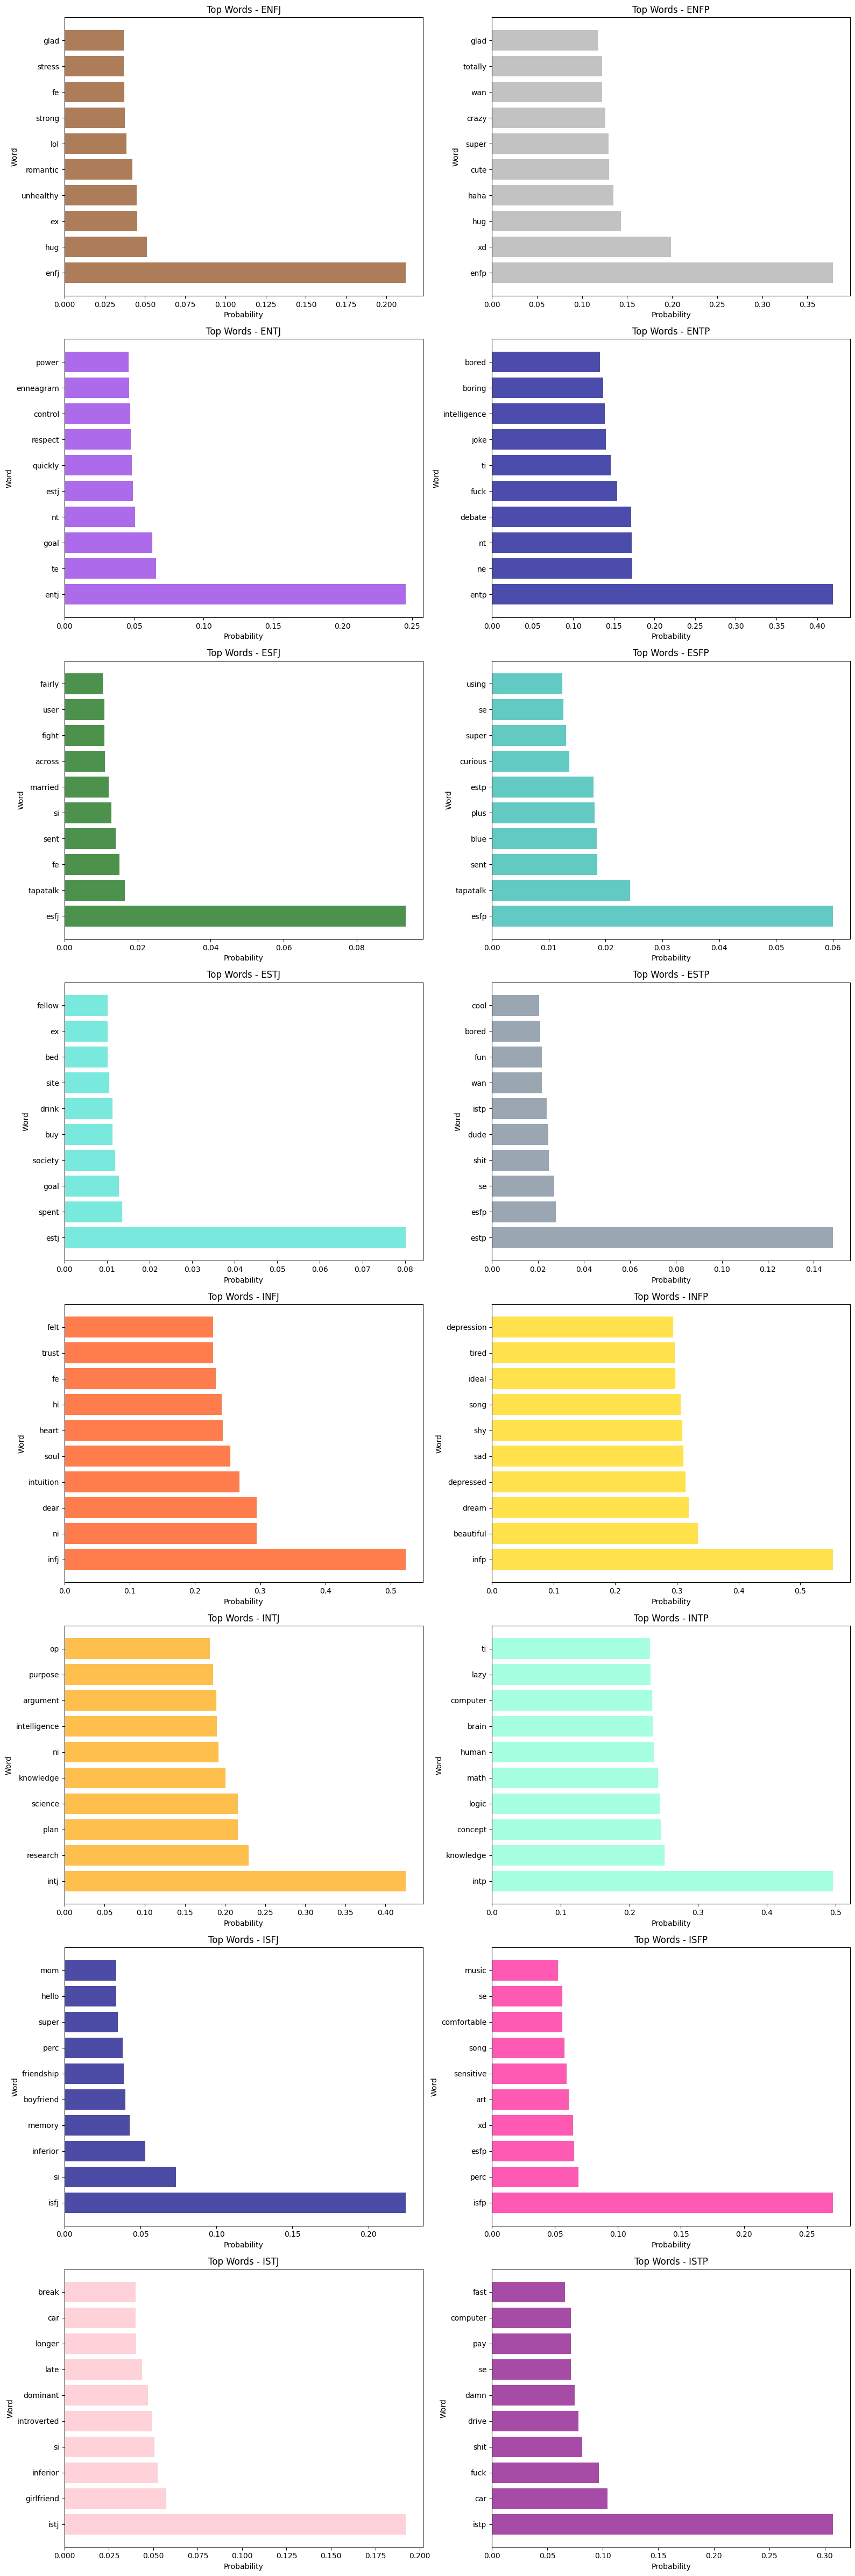

In [28]:
subplot_x = 2
subplot_y = 8

plt.figure(figsize=(8*subplot_x, 6*subplot_y))

# Create a 4x4 subplot grid
for i, mbti_type in enumerate(mbti_types, start=1):
    plt.subplot(subplot_y, subplot_x, i)
    words_df = most_probable_words[mbti_type]
    
    # Create a horizontal bar graph for each MBTI type
    plt.barh(words_df['word'], words_df[f'probability_{mbti_type}'], color=list(mbti_colors.values())[i-1], alpha=0.7)
    plt.title(f'Top Words - {mbti_type}')
    plt.xlabel('Probability')
    plt.ylabel('Word')

plt.tight_layout()
plt.show()


# Analysis

## Dataset Separation

In [5]:
# # Run if testing and cutting runtime, part 2
# df = pd.read_csv('features_extracted.csv', index_col=0)
# df = df.fillna('')

# # Drop irrelevant columns
# df = df.drop(['url', 'post', 'post_clean'], axis=1)

In [83]:
df.shape[0]

421757

In [6]:
# Create separate DataFrames for each MBTI dimension and a general 'MBTI' type
targets = ['E/I', 'S/N', 'T/F', 'J/P', 'type']

In [141]:
df['type'].value_counts().min()

1916

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the desired sample size for analysis and test as a percentage (e.g., 80% for analysis)
analysis_percentage = 0.8
test_percentage = 0.2

# Calculate the minimum sample size based on the least represented category
sample_size = df['type'].value_counts().min()*0.33 # 1/4 so total ends up around 10000

# Calculate the analysis sample size and test sample size based on percentages
analysis_sample_size = int(sample_size * analysis_percentage)
test_sample_size = int(sample_size * test_percentage)

# Initialize DataFrames for analysis and test
df_analysis = pd.DataFrame()
df_test = pd.DataFrame()

# Stratified sampling using list comprehensions
for _, group in df.groupby('type'):
    # Perform stratified sampling for analysis
    analysis_sample = group.sample(n=analysis_sample_size, random_state=123)

    # Add the sampled data to df_analysis
    df_analysis = pd.concat([df_analysis, analysis_sample], ignore_index=True)

    # Remove the sampled data from the group to create the test set
    remaining_data = group.drop(analysis_sample.index)

    # Sample the remaining data for the test set
    test_sample = remaining_data.sample(n=test_sample_size, random_state=123)

    # Add the sampled test data to df_test
    df_test = pd.concat([df_test, test_sample], ignore_index=True)

# Reset the index for both df_analysis and df_test
df_analysis = df_analysis.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Now, df_analysis contains 80% of the data, and df_test contains 20% of the data, both stratified by 'type'.


In [10]:
# For E/I
df_EI = df_analysis[['E/I'] + [col for col in df_analysis.columns if col not in targets]]

# For S/N
df_SN = df_analysis[['S/N'] + [col for col in df_analysis.columns if col not in targets]]

# For T/F
df_TF = df_analysis[['T/F'] + [col for col in df_analysis.columns if col not in targets]]

# For J/P
df_JP = df_analysis[['J/P'] + [col for col in df_analysis.columns if col not in targets]]

# For MBTI (type)
df_MBTI = df_analysis[['type'] + [col for col in df_analysis.columns if col not in targets]]

# List of target dfs
df_targets = [df_EI, df_SN, df_TF, df_JP, df_MBTI]


## Model Selection

In [13]:
def model_creation(dataset, target, model='lsvm'):
    y = dataset[target]
    X = dataset.drop(target, axis=1)

    model_fit = None

    if model == "logit":
        model_fit = LogisticRegression(max_iter=10000)
    elif model == "rforest":
        model_fit = RandomForestClassifier(n_estimators=100, random_state=123)
    elif model == "lsvm": 
        model_fit = LinearSVC(max_iter=10000)

    model_fit.fit(X, y)

    return model_fit

In [23]:
EI_logit = model_creation(df_EI, 'E/I', 'logit')
EI_rforest = model_creation(df_EI, 'E/I', 'rforest')
EI_lsvm = model_creation(df_EI, 'E/I', 'lsvm')

/opt/homebrew/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [24]:
SN_logit = model_creation(df_SN, 'S/N', 'logit')
SN_rforest = model_creation(df_SN, 'S/N', 'rforest')
SN_lsvm = model_creation(df_SN, 'S/N', 'lsvm')

/opt/homebrew/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [25]:
TF_logit = model_creation(df_TF, 'T/F', 'logit')
TF_rforest = model_creation(df_TF, 'T/F', 'rforest')
TF_lsvm = model_creation(df_TF, 'T/F', 'lsvm')

/opt/homebrew/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [26]:
JP_logit = model_creation(df_JP, 'J/P', 'logit')
JP_rforest = model_creation(df_JP, 'J/P', 'rforest')
JP_lsvm = model_creation(df_JP, 'J/P', 'lsvm')

/opt/homebrew/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [27]:
MBTI_logit = model_creation(df_MBTI, 'type', 'logit')
MBTI_rforest = model_creation(df_MBTI, 'type', 'rforest')
MBTI_lsvm = model_creation(df_MBTI, 'type', 'lsvm')

/opt/homebrew/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Model Optimization through Grid Search

In [28]:
def model_optimization(dataset, target, model):
    y = dataset[target].copy()
    X = dataset.drop(target, axis=1).copy()

    param_grid = {}
    if model == "logit":
        param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    elif model == "rforest":
        param_grid = {'n_estimators': [50, 100, 200]}
    elif model == "lsvm":
        param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

    kf = KFold(n_splits=5, shuffle=True, random_state=123)

    model_cv = None

    if model == "logit":
        model_cv = LogisticRegression(max_iter=1000)
    elif model == "rforest":
        model_cv = RandomForestClassifier(n_estimators=100, random_state=42)
    elif model == "lsvm": 
        model_cv = LinearSVC(max_iter=10000)

    grid_search = GridSearchCV(model_cv, param_grid, cv=kf, scoring='balanced_accuracy')
    grid_search.fit(X, y)

    return grid_search.best_estimator_

In [ ]:
best_estimators = {}

# E/I
EI_logit = model_optimization(df_EI, 'E/I', 'logit')
EI_rforest = model_optimization(df_EI, 'E/I', 'rforest')
EI_lsvm = model_optimization(df_EI, 'E/I', 'lsvm')
best_estimators['E/I_logit'] = EI_logit
best_estimators['E/I_rforest'] = EI_rforest
best_estimators['E/I_lsvm'] = EI_lsvm

In [ ]:
# S/N
SN_logit = model_optimization(df_SN, 'S/N', 'logit')
SN_rforest = model_optimization(df_SN, 'S/N', 'rforest')
SN_lsvm = model_optimization(df_SN, 'S/N', 'lsvm')
best_estimators['S/N_logit'] = SN_logit
best_estimators['S/N_rforest'] = SN_rforest
best_estimators['S/N_lsvm'] = SN_lsvm

In [ ]:
# T/F
TF_logit = model_optimization(df_TF, 'T/F', 'logit')
TF_rforest = model_optimization(df_TF, 'T/F', 'rforest')
TF_lsvm = model_optimization(df_TF, 'T/F', 'lsvm')
best_estimators['T/F_logit'] = TF_logit
best_estimators['T/F_rforest'] = TF_rforest
best_estimators['T/F_lsvm'] = TF_lsvm

In [ ]:
# J/P
JP_logit = model_optimization(df_JP, 'J/P', 'logit')
JP_rforest = model_optimization(df_JP, 'J/P', 'rforest')
JP_lsvm = model_optimization(df_JP, 'J/P', 'lsvm')
best_estimators['J/P_logit'] = JP_logit
best_estimators['J/P_rforest'] = JP_rforest
best_estimators['J/P_lsvm'] = JP_lsvm

In [ ]:
# Type
MBTI_logit = model_optimization(df_MBTI, 'type', 'logit')
MBTI_rforest = model_optimization(df_MBTI, 'type', 'rforest')
MBTI_lsvm = model_optimization(df_MBTI, 'type', 'lsvm')
best_estimators['type_logit'] = MBTI_logit
best_estimators['type_rforest'] = MBTI_rforest
best_estimators['type_lsvm'] = MBTI_lsvm

In [ ]:
best_estimators

In [15]:
# Best estimators

new_random_state = 123
best_estimators = {
    'E/I_logit': LogisticRegression(C=10, max_iter=1000, random_state=new_random_state),
    'E/I_rforest': RandomForestClassifier(n_estimators=50, random_state=new_random_state),
    'E/I_lsvm': LinearSVC(C=0.01, max_iter=10000, random_state=new_random_state),
    'S/N_logit': LogisticRegression(C=0.001, max_iter=1000, random_state=new_random_state),
    'S/N_rforest': RandomForestClassifier(n_estimators=200, random_state=new_random_state),
    'S/N_lsvm': LinearSVC(C=10, max_iter=10000, random_state=new_random_state),
    'T/F_logit': LogisticRegression(C=10, max_iter=1000, random_state=new_random_state),
    'T/F_rforest': RandomForestClassifier(random_state=new_random_state),
    'T/F_lsvm': LinearSVC(C=0.01, max_iter=10000, random_state=new_random_state),
    'J/P_logit': LogisticRegression(C=0.001, max_iter=1000, random_state=new_random_state),
    'J/P_rforest': RandomForestClassifier(n_estimators=200, random_state=new_random_state),
    'J/P_lsvm': LinearSVC(C=1, max_iter=10000, random_state=new_random_state),
    'type_logit': LogisticRegression(C=100, max_iter=1000, random_state=new_random_state),
    'type_rforest': RandomForestClassifier(n_estimators=200, random_state=new_random_state),
    'type_lsvm': LinearSVC(C=1, max_iter=10000, random_state=new_random_state),
}

In [ ]:
final_models = {}

# Loop through each model in best_estimators
for model_name, model in best_estimators.items():
    target_group = None
    X_train, X_test, y_train, y_test = None, None, None, None

    # Determine the target group for the model
    for target in targets:
        if target in model_name:
            target_group = target
            break

    if target_group:
        # Get the dataset for the current target group
        dataset = df_targets[targets.index(target_group)]

        # Split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(dataset.drop(target_group, axis=1), dataset[target_group], test_size=0.2, random_state=new_random_state)

        # Fit the model on the training data
        model.fit(X_train, y_train)

    # Store the model and related data in final_models
    final_models[model_name] = {
        'model': model,
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }

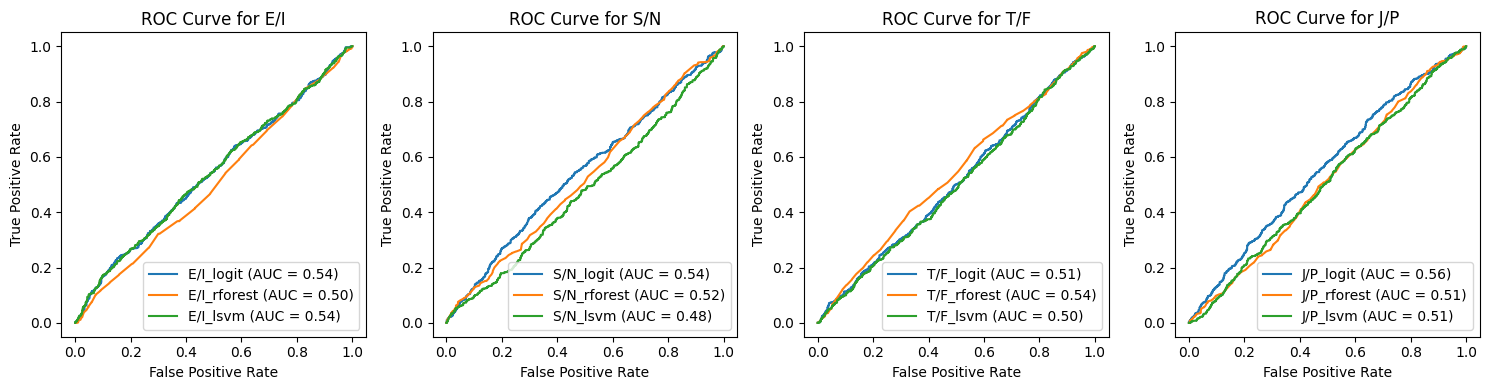

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# List of binary targets
binary_targets = ['E/I', 'S/N', 'T/F', 'J/P']

# Create subplots for each binary target
fig, axes = plt.subplots(1, len(binary_targets), figsize=(15, 4))

for i, target in enumerate(binary_targets):
    for model_name, model_data in final_models.items():
        if target in model_name:
            model = model_data['model']
            X_test = model_data['X_test']
            y_test = model_data['y_test']

            # Predict probabilities on the test data
            if isinstance(model, LinearSVC):
                decision_scores = model.decision_function(X_test)
                y_prob = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
            else:
                y_prob = model.predict_proba(X_test)[:, 1]

            # Calculate ROC curve and AUC
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            roc_auc = auc(fpr, tpr)

            # Plot ROC curve for the current model
            axes[i].plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # Set labels and legend for the current subplot
    axes[i].set_title(f'ROC Curve for {target}')
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].legend(loc='lower right')

plt.tight_layout()
plt.show()

In [18]:
from sklearn.metrics import balanced_accuracy_score

# List of binary targets
binary_targets = ['E/I', 'S/N', 'T/F', 'J/P']

# Initialize a dictionary to store the best model for each binary target
best_binary_models = {}

for target in binary_targets:
    best_model_name = None
    best_model_score = -1  # Initialize with a low value

    for model_name, model_data in final_models.items():
        if target in model_name:
            model = model_data['model']
            X_test = model_data['X_test']
            y_test = model_data['y_test']

            # Predict on the test data
            y_pred = model.predict(X_test)

            # Calculate balanced accuracy score
            bal_acc = balanced_accuracy_score(y_test, y_pred)

            # Check if the current model has a higher balanced accuracy score
            if bal_acc > best_model_score:
                best_model_score = bal_acc
                best_model_name = model_name

    # Store the best model name in the dictionary
    best_binary_models[target] = best_model_name

# Print the names of the models with the highest balanced accuracy score for each binary target
for target, best_model_name in best_binary_models.items():
    print(f"Binary Target: {target}")
    print(f"Best Model: {best_model_name}")
    print()

Binary Target: E/I
Best Model: E/I_lsvm

Binary Target: S/N
Best Model: S/N_logit

Binary Target: T/F
Best Model: T/F_rforest

Binary Target: J/P
Best Model: J/P_logit



In [139]:
from sklearn.metrics import accuracy_score
import pandas as pd

# Initialize lists to store model names and accuracy scores
model_names = ['E/I_lsvm', 'S/N_logit', 'T/F_rforest', 'J/P_logit']
accuracy_scores = []

# Calculate accuracy for each model and binary target
for model_name in model_names:
    # Get the best model
    best_model = final_models[model_name]['model']
    
    # Get the binary target for the model
    binary_target = model_name.split('_')[0]
    
    # Get the actual values for the binary target
    actual_values = df_model_test[binary_target]
    
    # Predict using the model
    predictions = best_model.predict(df_model_test.drop(targets, axis=1))
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(actual_values, predictions)
    accuracy_scores.append(accuracy)

# Create a DataFrame to display the accuracy scores
accuracy_table = pd.DataFrame({
    'Binary Target': ['E/I', 'S/N', 'T/F', 'J/P'],
    'Best Model': model_names,
    'Accuracy Score': accuracy_scores
})

# Print the accuracy table
print("Accuracy Table:")
print(accuracy_table)

Accuracy Table:
  Binary Target   Best Model  Accuracy Score
0           E/I     E/I_lsvm             0.7
1           S/N    S/N_logit             0.5
2           T/F  T/F_rforest             0.3
3           J/P    J/P_logit             0.4


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Target for multiclass classification
multiclass_target = 'type'

# Initialize variables to keep track of the best model and accuracy score
best_multiclass_model_name = None
best_multiclass_accuracy = -1  # Initialize with a low value
best_multiclass_y_test = None  # Initialize with None

# Initialize variables to store X and y for the best model
best_multiclass_X_test = None
best_multiclass_y_pred = None

# Iterate through the models in final_models for the multiclass target
for model_name, model_data in final_models.items():
    if multiclass_target in model_name:
        model = model_data['model']
        X_test = model_data['X_test']
        y_test = model_data['y_test']

        # Predict on the test data
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Check if the current model has a higher accuracy
        if accuracy > best_multiclass_accuracy:
            best_multiclass_accuracy = accuracy
            best_multiclass_model_name = model_name
            best_multiclass_y_test = y_test
            best_multiclass_X_test = X_test
            best_multiclass_y_pred = y_pred

# Print the best model based on accuracy
print(f"Best Multiclass Model for '{multiclass_target}' based on Accuracy:")
print(f"Model Name: {best_multiclass_model_name}")
print(f"Accuracy: {best_multiclass_accuracy:.2f}")

# Print classification report for the best model
print("Classification Report for the Best Model:")
print(classification_report(best_multiclass_y_test, best_multiclass_y_pred))

Best Multiclass Model for 'type' based on Accuracy:
Model Name: type_logit
Accuracy: 0.08
Classification Report for the Best Model:
              precision    recall  f1-score   support

        ENFJ       0.04      0.10      0.06        84
        ENFP       0.03      0.01      0.01       110
        ENTJ       0.06      0.05      0.06       110
        ENTP       0.06      0.02      0.03        99
        ESFJ       0.10      0.15      0.12        98
        ESFP       0.12      0.20      0.15       102
        ESTJ       0.11      0.12      0.12        85
        ESTP       0.08      0.15      0.11       101
        INFJ       0.07      0.27      0.11        95
        INFP       0.09      0.03      0.04       106
        INTJ       0.00      0.00      0.00       110
        INTP       0.09      0.02      0.04       123
        ISFJ       0.00      0.00      0.00       102
        ISFP       0.16      0.08      0.11       102
        ISTJ       0.20      0.01      0.02        94
   

/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# Predict on test variables
# For E/I
df_EI_test = df_test[['E/I'] + [col for col in df_test.columns if col not in targets]]

# For S/N
df_SN_test = df_test[['S/N'] + [col for col in df_test.columns if col not in targets]]

# For T/F
df_TF_test = df_test[['T/F'] + [col for col in df_test.columns if col not in targets]]

# For J/P
df_JP_test = df_test[['J/P'] + [col for col in df_test.columns if col not in targets]]

# For MBTI (type)
df_MBTI_test = df_test[['type'] + [col for col in df_test.columns if col not in targets]]

# List of target dfs
df_targets_test = [df_EI, df_SN, df_TF, df_JP, df_MBTI]


In [40]:
df_model_test = df_test.sample(10, random_state=123)

In [48]:
sample_data_ei

,post_length,readability,post_caps_over_50_percent,has_youtu_url,has_tumblr_url,has_imgur_url,has_personalitycafe_url,has_other_url,self_reference,references_others,anger,fear,joy,love,sadness,surprise
1647,193,92.83,False,0,0,0,0,0,0,0,0.08,0.02,0.72,0.05,0.12,0.01
1423,200,53.17,False,0,0,0,0,0,0,0,0.03,0.01,0.88,0.02,0.06,0.00
988,193,84.68,False,0,0,0,0,0,1,1,0.06,0.06,0.69,0.02,0.17,0.00
357,198,70.63,False,0,0,0,0,0,1,4,0.00,0.94,0.04,0.01,0.01,0.00
533,196,67.45,False,0,0,0,0,0,0,0,0.14,0.13,0.68,0.01,0.04,0.00
1445,197,92.12,False,0,0,0,0,0,0,0,0.14,0.08,0.59,0.04,0.15,0.00
356,197,92.12,False,0,0,0,0,0,0,0,0.14,0.08,0.48,0.03,0.26,0.01
394,124,113.81,False,0,0,0,0,0,0,0,0.06,0.06,0.69,0.01,0.18,0.00
1149,201,98.72,False,0,0,0,0,0,0,0,0.07,0.08,0.51,0.18,0.15,0.01
854,5,121.22,False,0,0,0,0,0,0,0,0.11,0.15,0.70,0.00,0.04,0.00


In [50]:
import pandas as pd

# Assuming 'E/I_logit' is the best model for 'E/I' target
best_model_name_ei = 'E/I_logit'

# Get the best model for 'E/I' target
best_model_ei = final_models[best_model_name_ei]['model']

# Sample 10 predictions for 'E/I' target
sample_data_ei = df_model_test.drop(targets, axis=1).sample(10, random_state=123)
sample_ei_predictions = best_model_ei.predict(sample_data_ei)

# Create a sample_table to display predicted vs. actual values
sample_table_ei = pd.DataFrame({
    'Actual': df_model_test['E/I'],  # Assuming 'E/I' is the actual column
    'Predicted': sample_ei_predictions
})

# Print the sample_table
print("Sample Table for 'E/I' Target:")
sample_table_ei

Sample Table for 'E/I' Target:


,Actual,Predicted
1423,0,0
356,1,0
854,1,1
1445,0,1
1647,0,0
357,1,0
394,1,0
988,1,0
533,1,0
1149,0,1


In [52]:
import pandas as pd

# Assuming 'S/N_rforest' is the best model for 'S/N' target
best_model_name_sn = 'S/N_rforest'

# Get the best model for 'S/N' target
best_model_sn = final_models[best_model_name_sn]['model']

# Sample 10 predictions for 'S/N' target
sample_data_sn = df_model_test.drop(targets, axis=1).sample(10, random_state=123)
sample_sn_predictions = best_model_sn.predict(sample_data_sn)

# Create a sample_table to display predicted vs. actual values
sample_table_sn = pd.DataFrame({
    'Actual': df_model_test['S/N'],  # Assuming 'S/N' is the actual column
    'Predicted': sample_sn_predictions
})

# Print the sample_table
print("Sample Table for 'S/N' Target:")
sample_table_sn

Sample Table for 'S/N' Target:


,Actual,Predicted
1423,0,1
356,0,1
854,1,1
1445,0,0
1647,1,0
357,0,0
394,0,1
988,1,1
533,1,1
1149,0,0


In [56]:
import pandas as pd

# Assuming 'T/F_lsvm' is the best model for 'T/F' target
best_model_name_tf = 'T/F_lsvm'

# Get the best model for 'T/F' target
best_model_tf = final_models[best_model_name_tf]['model']

# Sample 10 predictions for 'T/F' target
sample_data_tf = df_model_test.drop(targets, axis=1).sample(10, random_state=123)
sample_tf_predictions = best_model_tf.predict(sample_data_tf)

# Create a sample_table to display predicted vs. actual values
sample_table_tf = pd.DataFrame({
    'Actual': df_model_test['T/F'],  # Assuming 'T/F' is the actual column
    'Predicted': sample_tf_predictions
})

# Print the sample_table
print("Sample Table for 'T/F' Target:")
sample_table_tf

Sample Table for 'T/F' Target:


,Actual,Predicted
1423,1,1
356,1,1
854,1,0
1445,1,0
1647,0,1
357,1,1
394,1,1
988,1,1
533,0,0
1149,0,1


In [55]:
import pandas as pd

# Assuming 'J/P_rforest' is the best model for 'J/P' target
best_model_name_jp = 'J/P_rforest'

# Get the best model for 'J/P' target
best_model_jp = final_models[best_model_name_jp]['model']

# Sample 10 predictions for 'J/P' target
sample_data_jp = df_model_test.drop(targets, axis=1).sample(10, random_state=123)
sample_jp_predictions = best_model_jp.predict(sample_data_jp)

# Create a sample_table to display predicted vs. actual values
sample_table_jp = pd.DataFrame({
    'Actual': df_model_test['J/P'],  # Assuming 'J/P' is the actual column
    'Predicted': sample_jp_predictions
})

# Print the sample_table
print("Sample Table for 'J/P' Target:")
sample_table_jp

Sample Table for 'J/P' Target:


,Actual,Predicted
1423,0,0
356,1,0
854,1,1
1445,0,1
1647,0,0
357,1,0
394,0,0
988,0,1
533,1,0
1149,0,0


In [58]:
import pandas as pd

# Assuming 'type_rforest' is the best model for 'type' target
best_model_name_type = 'type_rforest'

# Get the best model for 'type' target
best_model_type = final_models[best_model_name_type]['model']

# Sample 10 predictions for 'type' target
sample_data_type = df_model_test.drop(targets, axis=1).sample(10, random_state=123)
sample_type_predictions = best_model_type.predict(sample_data_type)

# Create a sample_table to display predicted vs. actual values
sample_table_type = pd.DataFrame({
    'Actual': df_model_test['type'],  # Assuming 'type' is the actual column
    'Predicted': sample_type_predictions
})

# Print the sample_table
print("Sample Table for 'type' Target:")
sample_table_type

Sample Table for 'type' Target:


,Actual,Predicted
1423,INTP,ISTP
356,ENTJ,ISTP
854,ESTJ,ISFP
1445,INTP,INFJ
1647,ISFP,ENTP
357,ENTJ,INFP
394,ENTP,ESFP
988,ESTP,ISFJ
533,ESFJ,ISTP
1149,INFP,ENFP
